<a href="https://colab.research.google.com/github/JGutierrez90/Tesis_Juan_EAFIT_2025/blob/main/Analisis_Data_encuesta_19mayo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SET UP DEL ENTORNO DE PROGRAMACIÓN

## Sincronización de notebook con Cuenta de Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Descargue de librerías necesarias para las primeras fases del proyecto

In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.3 MB/s eta 0:00:00


In [ ]:
from mpmath import mp

In [ ]:
  #importar las librerias necesarias.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from pingouin import cronbach_alpha

In [ ]:
#Carga del archivo en un dataframe
df = pd.read_excel('data_enc.xlsx')
df.head()

,Fecha de inicio,Fecha de finalización,Tipo de respuesta,Dirección IP,Progreso,Duración (en segundos),Finalizado,Fecha registrada,ID de respuesta,Latitud de la ubicación,...,1. ¿Cuál de las siguientes siete figuras describe mejor la compatibilidad entre tu género y tu programa académico?,2. ¿Cuál de las siguientes siete figuras describe qué tan compatible piensas que eres tú como persona con estar en un programa en áreas STEM?,3. ¿Cuál de las siguientes siete figuras describe mejor la compatibilidad entre tu género y STEM?,"1. ¿Cuáles son los adjetivos o términos que describen a las mujeres en áreas STEM? Es decir, las mujeres en áreas STEM son...","2. ¿Cuáles son los adjetivos o términos que describen a los hombres en áreas STEM? Es decir, los hombres en áreas STEM son...","3. ¿Cuáles son las características (sociales, psicológicas, físicas, etc.) de una persona que estudia en áreas STEM?","4. ¿Cuáles son las características (sociales, psicológicas, físicas, etc.) de una persona que estudia ciencias sociales, humanidades, letras, etc.?","5. ¿Qué áreas de estudio, programas y/o profesiones consideras ""exclusivas para hombres"", ""exclusivas para mujeres"" y/o ""para ambos sexos""? ¿Por qué?",6. ¿Cuál es tu percepción acerca de los derechos y oportunidades de mujeres y hombres en los estudios y/o en el ámbito laboral relacionados con el área STEM? ¿Por qué?,7. Indica brevemente qué consideras por ciencia.
0,45709.310336,45709.327245,IP Address,191.156.39.113,100,1461,True,45709.327263,R_7HwzAJ5BaMgXx7I,6.2529,...,5.0,5.0,6.0,Creativas\nEficaces\nFuertes en procesos y sis...,Trabajadores\nFuertes en el área técnica,Inteligente \nResiliente\nDedicado,Empático \nCreativo \nSensible,Pienso que no existen brechas y que las áreas ...,Hay prejuicios que no favorecen a las mujeres ...,Método lógico estructurado experimental y crí...
1,45709.442315,45709.447280,IP Address,172.225.238.105,100,429,True,45709.447294,R_1k6bEJNp13e0kZj,4.6115,...,7.0,3.0,7.0,"CAPACES, TESAS, DISCIPLINADAS","A VECES PREPOTENTES, ENTREGADOS, DISCIPLINADOS","CALLADO, ENTREGADO, POCO SOCIAL","SOCIAL, AMIGABLE, FELIZ",SE DICE QUE LAS INGENIERÍAS SON EXCLUSIVAS OAR...,"TIENEN MÁS DERECHOS LOS HOMBRES, PUES SE PODEB...",ESTUDIO POR MÉTODO CIENTÍFICO DE ALGO
2,45709.442303,45709.448877,IP Address,181.78.78.234,100,567,True,45709.448886,R_5Fh8IAVdPBN66kX,4.6633,...,6.0,6.0,7.0,Muy tesas e inteligentes,Seguros y precisos,"Atento, disciplina, responsable, amigable, bue...",Pensamiento crítico,"Ninguna, que la gente estudie lo que quiera",Actualmente se ha visto mejorar las oportunida...,Todos los procesos que hacemos en nuestro día ...
3,45709.442419,45709.449410,IP Address,200.12.188.120,100,603,True,45709.449421,R_6Z8z7IS2nuAK9zz,6.2529,...,2.0,5.0,4.0,Exitosas,Exitosos,"estudioso, innovador",Analítico,Ninguno,Las mujeres tienen menos oportunidad por las c...,El estudio de un campo.
4,45709.443947,45709.449468,IP Address,200.12.188.94,100,476,True,45709.449481,R_5OZxa1H1rHJ8wl0,4.6351,...,6.0,7.0,7.0,"Seguras, atrevidas",Dominadores,"Inteligente, responsable",Reflexivos,Ninguno,Ya no hay tanta brecha entre hombres y mujeres...,Buscarle respuesta a el funcionamiento del mundo


# 1. CARGUE DE DATOS Y 1RA FASE DE LIMPIEZA

In [ ]:
#Tamaño de la tabla original sin procesar
print("la tabla tiene (filas, Columnas)\n\t\t", df.shape)

la tabla tiene (filas, Columnas)
		 (1007, 97)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 97 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [ ]:
#Quitar a los registros que correspondan a menores de edad
dfpre1= df[df['Edad en años (solo números sin espacio)'] >= 18]

#Quitar a los registros de edad que estén vacíos
dfpre1 = dfpre1[
    dfpre1['Edad en años (solo números sin espacio)'].notna() &
    (dfpre1['Edad en años (solo números sin espacio)'].astype(str).str.strip() != '')
]

#Quitar a los registros que correspondan a encuestas incompletas
dfpre1 = dfpre1[dfpre1['Progreso'] >= 76]
print(dfpre1['Progreso'].describe())


#Quitar a los registros atípicos que persisten sin el diligenciamiento completo
id_a_borrar = ['R_7lSrkdBTUeNyNFv', 'R_5tLSJarq6XpSzgC', 'R_6S7SnL86wkW3bUg', 'R_3RXWSqsPp2FsRvb']
dfpre1 = dfpre1[~dfpre1['ID de respuesta'].isin(id_a_borrar)]

# Tamaño de la tabla luego de la remoción de encuestas con algún tipo de problema
print('La tabla tiene (Filas, Coumnnas) \n\t\t', dfpre1.shape)

count    669.000000
mean      97.704036
std        7.064438
min       76.000000
25%      100.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: Progreso, dtype: float64
La tabla tiene (Filas, Coumnnas) 
		 (665, 97)


# OJO OMITIR no correr esta sección 23 jun 19:32  2.1 SECCIóN DE ANÁLISIS EXPLORARIO DE DATOS
Acá se utiliza en primera instancia la estadística Descriptiva.

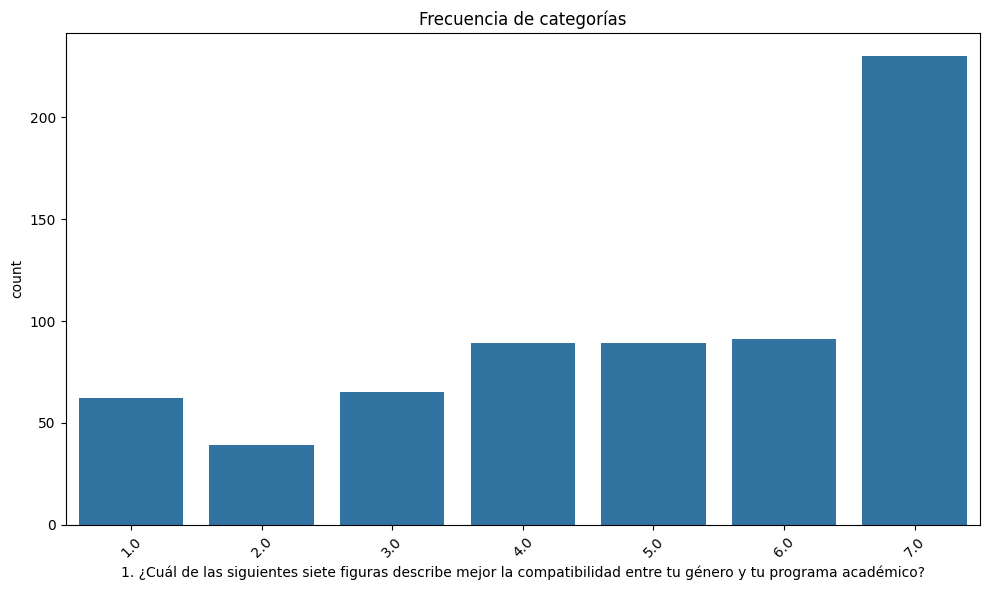

In [ ]:
df['1. ¿Cuál de las siguientes siete figuras describe mejor la compatibilidad entre tu género y tu programa académico?'].value_counts()

plt.figure(figsize=(10, 6))

sns.countplot(data = dfpre1, x = '1. ¿Cuál de las siguientes siete figuras describe mejor la compatibilidad entre tu género y tu programa académico?')
plt.xticks(rotation=45)  # Opcional, si hay muchas categorías
plt.title("Frecuencia de categorías")
plt.tight_layout()
plt.show()

In [ ]:
df['1. ¿Cuál de las siguientes siete figuras describe mejor la compatibilidad entre tu género y tu programa académico?'].value_counts()

In [ ]:
sns.countplot(data =dfpre1, x = '2. ¿Cuál de las siguientes siete figuras describe qué tan compatible piensas que eres tú como persona con estar en un programa en áreas STEM?')
plt.xticks(rotation=45)
plt.title("Frecuencia de categorías")
plt.show()

In [ ]:
df['2. ¿Cuál de las siguientes siete figuras describe qué tan compatible piensas que eres tú como persona con estar en un programa en áreas STEM?'].value_counts()

In [ ]:
sns.countplot(data =dfpre1, x = '3. ¿Cuál de las siguientes siete figuras describe mejor la compatibilidad entre tu género y STEM?')
plt.xticks(rotation=45)
plt.title("Frecuencia de categorías")
plt.show()

In [ ]:
df['3. ¿Cuál de las siguientes siete figuras describe mejor la compatibilidad entre tu género y STEM?'].value_counts()

In [ ]:
sns.countplot(data = dfpre1, x = 'Sexo biológico')
plt.xticks(rotation=45)
plt.title("Frecuencia de categorías")
plt.show()

In [ ]:
df['Sexo biológico'].value_counts()

In [ ]:
sns.countplot(data = dfpre1, x = 'Semestre más avanzado que estás cursando')
plt.xticks(rotation=45)
plt.title("Frecuencia de categorías")
plt.show()

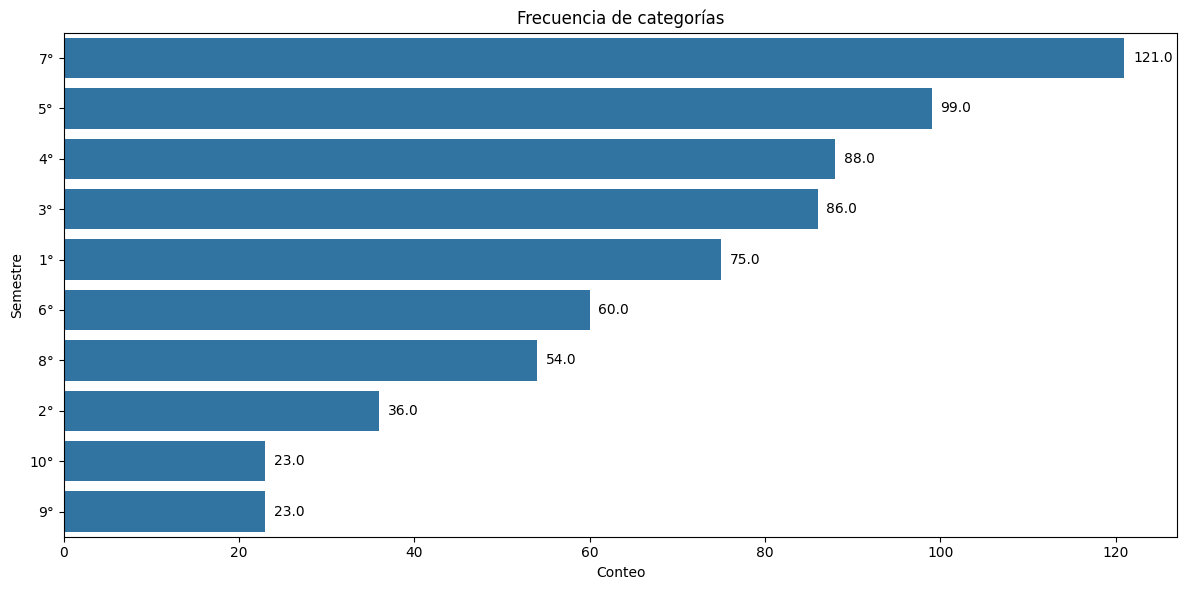

In [ ]:
# Contar y ordenar las categorías
orden = dfpre1['Semestre más avanzado que estás cursando'].value_counts().sort_values(ascending=False).index

# Gráfico horizontal ordenado
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=dfpre1,
    y='Semestre más avanzado que estás cursando',
    order=orden
)

# Etiquetas sobre las barras
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}',
                (width + 1, p.get_y() + p.get_height() / 2),
                va='center')

# Estética
plt.title("Frecuencia de categorías")
plt.xlabel("Conteo")
plt.ylabel("Semestre")
plt.tight_layout()
plt.show()

In [ ]:
columna_confianza = "Selecciona la opción más afín respecto a tus cursos STEM (Ciencia, Tecnología, Ingeniería y Matemáticas, por sus siglas en inglés).\n\nNo hay respuestas correctas o incorrectas. - 1. Confío en mi habilidad para aprender el material de mis cursos."
dfpre1 = dfpre1.dropna(subset=[columna_confianza])
print(dfpre1[columna_confianza].isnull().sum())  # Debería dar 0


0


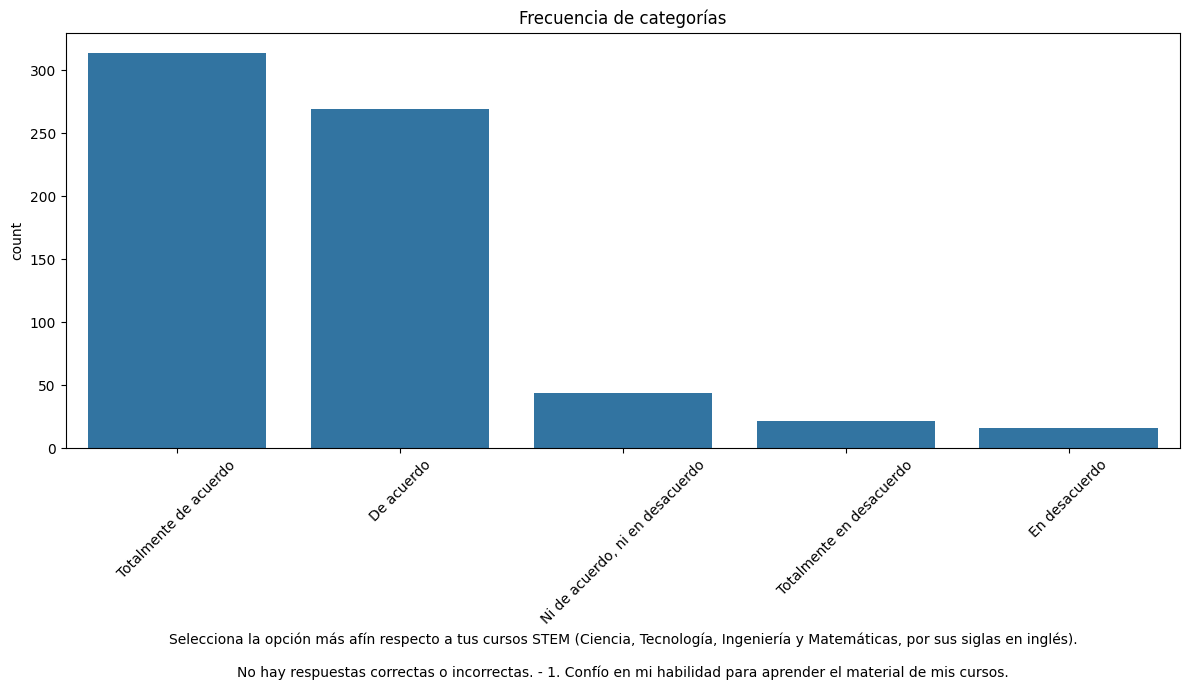

In [ ]:
plt.figure(figsize=(12,7))

sns.countplot(data = dfpre1, x = columna_confianza)
plt.xticks(rotation=45)
plt.title("Frecuencia de categorías")
plt.tight_layout()
plt.show()

In [ ]:
df[columna_confianza].value_counts()

In [ ]:
columna_confianza2 = 'Selecciona la opción más afín respecto a tus cursos STEM (Ciencia, Tecnología, Ingeniería y Matemáticas, por sus siglas en inglés).\n\nNo hay respuestas correctas o incorrectas. - 2. Tengo la capacidad de aprender el material de mis cursos.'
sns.countplot(data = dfpre1, x = columna_confianza2)
plt.xticks(rotation=45)
plt.title("Frecuencia de categorías")
plt.show()

In [ ]:
dfpre1[columna_confianza2].value_counts()

In [ ]:
columna_confianza3 = 'Selecciona la opción más afín respecto a tus cursos STEM (Ciencia, Tecnología, Ingeniería y Matemáticas, por sus siglas en inglés).\n\nNo hay respuestas correctas o incorrectas. - 3. Soy capaz de lograr mis metas en mis cursos.'
sns.countplot(data = dfpre1, x = columna_confianza3)
plt.xticks(rotation=45)
plt.title("Frecuencia de categorías")
plt.show()

In [ ]:
dfpre1[columna_confianza3].value_counts()

In [ ]:
print(dfpre1.columns.tolist())

['Fecha de inicio', 'Fecha de finalización', 'Tipo de respuesta', 'Dirección IP', 'Progreso', 'Duración (en segundos)', 'Finalizado', 'Fecha registrada', 'ID de respuesta', 'Latitud de la ubicación', 'Longitud de la ubicación', 'Canal de la distribución', 'Idioma del usuario', 'Addressing gender issues in STEM higher education institutions\n\n\n\nEncuesta: "Desde STEM hasta mi Programa Académico: Una Mirada Personal"\n\n\n\nCONSENTIMIENTO INFORMADO\n \n\nTítulo del Proyecto: STEM sin Fronteras de Género: Estrategias para una Educación Inclusiva\n\n\n\nDescripción del Proyecto:\n\nUsted ha sido seleccionado para participar en un estudio llevado a cabo por el Institute for the Future of Education del Tecnológico de Monterrey, México, junto con la Universidad del Norte, la Universidad EAFIT y la Universidad ICESI en Colombia. Este estudio tiene como objetivo explorar las perspectivas de los estudiantes sobre su desarrollo personal y su experiencia en los programas académicos de las áreas 

# 2.2. SEGUNDA SESIÓN DE LIMPIEZA DE DATOS

In [ ]:
#Retirar de la primera base de datos filtrada columnas que no voy a utilizar
col_a_borrar = [
    'Fecha de inicio',
    'Fecha de finalización',
    'Tipo de respuesta',
    'Dirección IP',
    'Progreso',
    'Duración (en segundos)',
    'Finalizado',
    'Fecha registrada',
    'Latitud de la ubicación',
    'Longitud de la ubicación',
    'Canal de la distribución',
    'Idioma del usuario',
    'Addressing gender issues in STEM higher education institutions\n\n\n\nEncuesta: "Desde STEM hasta mi Programa Académico: Una Mirada Personal"\n\n\n\nCONSENTIMIENTO INFORMADO\n \n\nTítulo del Proyecto: STEM sin Fronteras de Género: Estrategias para una Educación Inclusiva\n\n\n\nDescripción del Proyecto:\n\nUsted ha sido seleccionado para participar en un estudio llevado a cabo por el Institute for the Future of Education del Tecnológico de Monterrey, México, junto con la Universidad del Norte, la Universidad EAFIT y la Universidad ICESI en Colombia. Este estudio tiene como objetivo explorar las perspectivas de los estudiantes sobre su desarrollo personal y su experiencia en los programas académicos de las áreas de ciencia, ingeniería, tecnología y matemáticas (STEM, por sus siglas en inglés).\n\n\n\nComo sujeto de la investigación a usted se le solicitará participar en las siguientes actividades:\n\n\n\tActividad: Encuesta.\n\tTiempo de Duración (aproximado): 12-14 minutos.\n\tObjetivo de la actividad: Recopilar datos sobre la perspectiva del estudiantado en relación con su programa académico en áreas STEM. Una vez completada la investigación, se destruirán todas las fuentes de datos, notas y otros documentos relacionados. Los datos de la investigación serán recogidos por la Dra. Silvana Montoya Noguera investigadora responsable, y serán utilizados únicamente en el contexto del proyecto previamente estipulado. La investigación se desarrollará en los predios de la Universidad.\n\n\nRiesgos y Beneficios:\n\nPueden existir riesgos asociados a la participación en este estudio, como posibles tensiones emocionales al reflexionar sobre temas sensibles. Sin embargo, los beneficios incluyen la oportunidad de contribuir a la comprensión y abordaje de los problemas de género en las instituciones de educación superior que se centran en las áreas STEM. Además, en caso de ser necesario, pueden contactar al El Departamento de Desarrollo Estudiantil, de la Dirección de Desarrollo Humano-Bienestar Universitario a través del correo electrónico dllo.estudiantil@eafit.edu.co para recibir apoyo.\n\nPor otro lado, este estudio ofrece beneficios significativos, incluyendo la oportunidad de contribuir a la comprensión y solución de los problemas de género en las instituciones de educación superior, especialmente en las áreas STEM.\n\n\n\nRemuneración: \n\nNo se ofrece remuneración por participar en este estudio.\n\n\n\nAlmacenamiento de datos para proteger la confidencialidad:\n\nSu identidad y cualquier otra información que lo pueda identificar no serán reveladas en ninguna presentación pública del estudio. La información será tratada de forma confidencial y todas las fuentes de datos se mantendrán resguardadas por el equipo de investigación.\n\n\n\nTiempo:\n\nEl tiempo de participación requerido por el proyecto es de aproximadamente de 12 a 14 minutos para completar la encuesta. El período de recopilación de datos es de febrero a abril de 2025.\n\n\n\nUso de los resultados:\n\nLos resultados de este estudio se presentarán en forma de informes a comisiones institucionales, ponencias a congresos, encuentros o reuniones nacionales e internacionales, artículos para revistas indexadas, y capítulos de libros y/o libros.\n\n \n\nDERECHO DE LOS PARTICIPANTES\n\n\n\nInvestigadores principales: Dra. Silvana Montoya Noguera.\n\n\n\nTítulo del proyecto: Addressing gender issues in STEM higher education institutions.\n\n\n\nAl seleccionar la opción "Sí", acepto que: \n\n\n\tHe leído y comprendido la descripción del estudio.\n\tHe tenido la oportunidad de formular preguntas sobre los propósitos y procedimientos del estudio.\n\tEntiendo que mi participación en el estudio es voluntaria y que puedo decidir no participar o retirarme en cualquier momento sin ningún perjuicio futuro.\n\tAcepto que los investigadores pueden retirarme del estudio según su discreción profesional.\n\tEn caso de que surja nueva información durante el estudio que pueda afectar mi disposición para continuar participando, los investigadores me informarán al respecto.\n\tEntiendo que cualquier información que pueda identificarme personalmente derivada del estudio no será divulgada sin mi consentimiento explícito.\n\tConfirmo que he recibido la información necesaria sobre el estudio.\n\tAl seleccionar “Sí”, expreso mi decisión de participar en el estudio.\n\n\nSi tiene alguna pregunta o duda respecto a este estudio en que se le está invitando a participar, puede contactarse con la Dra. Silvana Montoya Noguera, investigadora responsable, al correo electrónico: smontoyan@eafit.edu.co. Si tiene dudas con respecto a los derechos y deberes que tiene usted como sujeto participante del estudio debe comunicarse con el Natalia Yepes Jimenez del Comité de ética en investigación que avala este proyecto, en este caso, el Comité de ética en investigación de la Universidad EAFIT: cei@eafit.edu.co\u200b\u200b\u200b. Página web del Comité: https://www.eafit.edu.co/investigacion/Paginas/Comite-Institucional-de-Etica-en-Investigacion.aspx.\n\n\n \n\n Acepto participar',
    'Nombre completo',
    'Código',
    '1. ¿Cuáles son los adjetivos o términos que describen a las mujeres en áreas STEM? Es decir, las mujeres en áreas STEM son...',
    '2. ¿Cuáles son los adjetivos o términos que describen a los hombres en áreas STEM? Es decir, los hombres en áreas STEM son...',
    '3. ¿Cuáles son las características (sociales, psicológicas, físicas, etc.) de una persona que estudia en áreas STEM?',
    '4. ¿Cuáles son las características (sociales, psicológicas, físicas, etc.) de una persona que estudia ciencias sociales, humanidades, letras, etc.?',
    '5. ¿Qué áreas de estudio, programas y/o profesiones consideras "exclusivas para hombres", "exclusivas para mujeres" y/o "para ambos sexos"? ¿Por qué?',
    '6. ¿Cuál es tu percepción acerca de los derechos y oportunidades de mujeres y hombres en los estudios y/o en el ámbito laboral relacionados con el área STEM? ¿Por qué?',
    '7. Indica brevemente qué consideras por ciencia.'
]

In [ ]:
dfpre2 = dfpre1.drop(columns = col_a_borrar)
print('\nDataframe después de borrar las columnas')
print(dfpre2.shape)
print(dfpre2.dtypes)


Dataframe después de borrar las columnas
(665, 75)
ID de respuesta                                                                                                                                                                                object
Edad en años (solo números sin espacio)                                                                                                                                                       float64
Sexo biológico                                                                                                                                                                                 object
Programa académico                                                                                                                                                                             object
Semestre más avanzado que estás cursando                                                                                                                    

##2.3 ESTADÍSTICA DESCRIPTIVA A VARIABLES SELECCIONADAS.

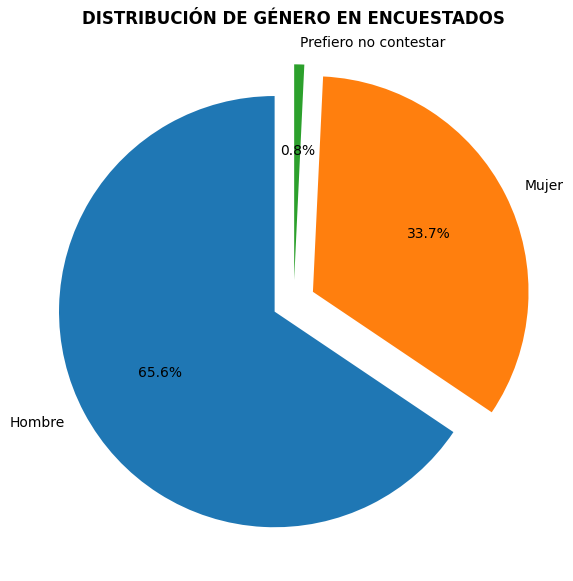

In [ ]:
#PRIMERA VARIABLE A DESCRIBIR: GENERO *PASTEL*

past_gen = dfpre2['Sexo biológico'].value_counts()
print('\n\n')
# --- Graficamos el pastel con mejoras ---
plt.figure(figsize=(7, 7)) # Hacemos el gráfico más grande y cuadrado para que se vea bien

past_gen.plot.pie(
    autopct='%1.1f%%',  # Formato para mostrar porcentajes con un decimal. Ej: '37.5%'
    startangle=90,      # Inicia el primer trozo en la parte superior (90 grados)
    shadow=False,        # Añade una ligera sombra para un efecto 3D
    explode=(0.1, 0.1, 0.1) # "Explota" o separa ligeramente el primer trozo (el más grande)
)
plt.title('DISTRIBUCIÓN DE GÉNERO EN ENCUESTADOS', fontweight = 'bold')
plt.ylabel('') # Borramos la etiqueta de y
plt.show()

In [ ]:
print('conteo genero\n', past_gen)

conteo genero
 Sexo biológico
Hombre                   436
Mujer                    224
Prefiero no contestar      5
Name: count, dtype: int64


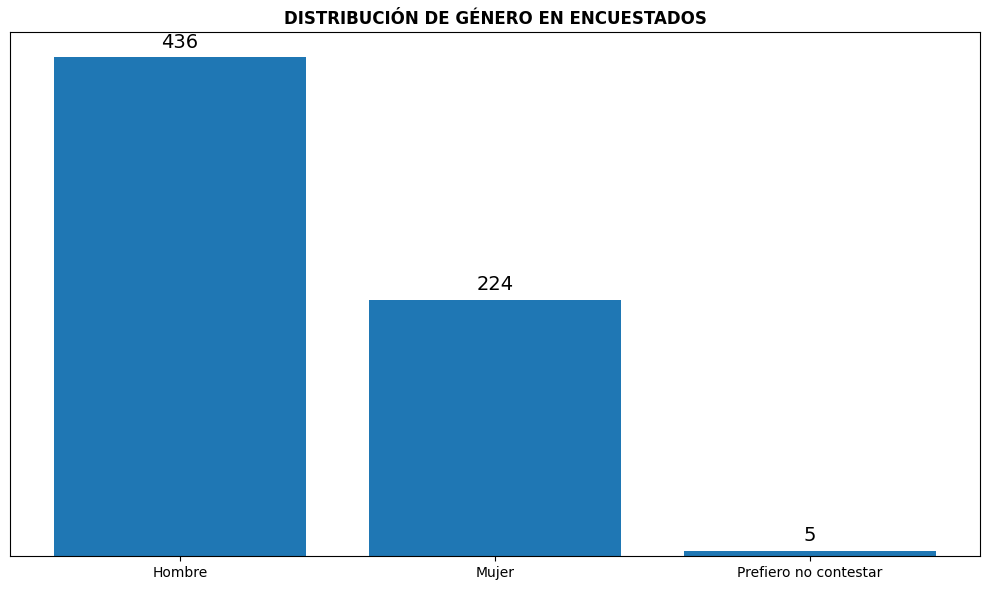

In [ ]:
#PRIMERA VARIABLE A DESCRIBIR: GENERO *BARRAS*

bar_gen = dfpre2['Sexo biológico'].value_counts() #Conteo de cada categoría.

fig, ax = plt.subplots(figsize=(10, 6)) # Ajuste del tamaño de la figura en esta línea.

bars1 = ax.bar(bar_gen.index, bar_gen.values) #Construcción de gráfico de barras.

#Quitar las marcas del eje y
ax.yaxis.set_visible(True)
#Dejar la línea y los guiones pequeños solamente
ax.set_yticks([])
ax.set_yticklabels([])

#Mostrar valores como etiquetas en la parte superior del gráfico.
ax.bar_label(bars1, fmt='%d', padding=4, fontsize=14, color='black')

plt.title('DISTRIBUCIÓN DE GÉNERO EN ENCUESTADOS', fontweight = 'bold')
plt.tight_layout()
plt.show()

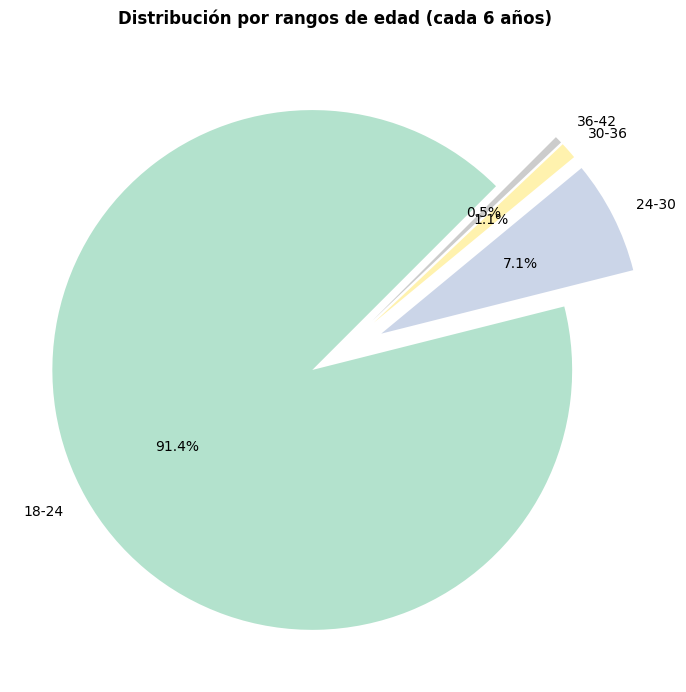

In [ ]:
#SEGUNDA VARIABLE A DESCRIBIR: EDAD *PASTEL*

# Definir los bins (ajusta si tienes valores fuera del rango)
bins = range(18, 48, 6)  # Rango de 18 a 42 años, de 6 en 6
labels = [f"{i}-{i+6}" for i in bins[:-1]]  # Etiquetas tipo "15-19", "20-24", etc.

# Agrupar edades en rangos
past_edad = pd.cut(dfpre2["Edad en años (solo números sin espacio)"], bins=bins, labels=labels, right=False)
past_edad[219] = '36-42'

# Contar por grupo
count_past_edad = past_edad.value_counts().sort_index()


# Graficar el diagrama de pastel
plt.figure(figsize=(7, 8))
count_past_edad.plot.pie(autopct='%1.1f%%', startangle=45, cmap='Pastel2', explode=(0.1, 0.2, 0.2, 0.2))
plt.title("Distribución por rangos de edad (cada 6 años)", fontweight='bold')
plt.ylabel("")
plt.tight_layout()
plt.show()


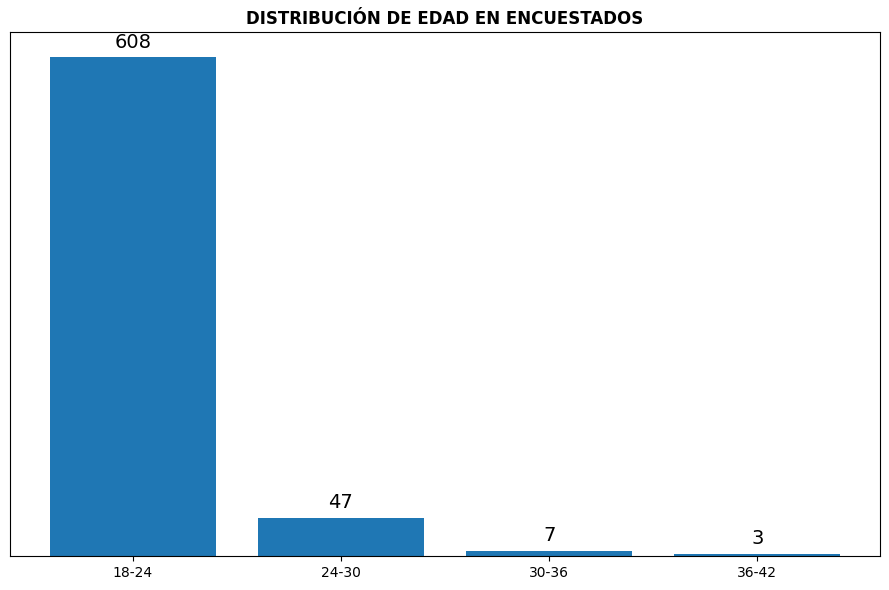

In [ ]:
#SEGUNDA VARIABLE A DESCRIBIR:  EDAD *BARRAS*

fig, ax = plt.subplots(figsize=(9, 6)) # Ajuste del tamaño de la figura en esta línea.

bars2 = ax.bar(count_past_edad.index, count_past_edad.values) #construcción gráfica de barras de edades

#Quitar las marcas del eje y
ax.yaxis.set_visible(True)
#Dejar la línea y los guiones pequeños solamente
ax.set_yticks([])
ax.set_yticklabels([])

#Mostrar valores como etiquetas en la parte superior del gráfico.
ax.bar_label(bars2, fmt='%d', padding=4, fontsize=14, color='black')

plt.title('DISTRIBUCIÓN DE EDAD EN ENCUESTADOS', fontweight = 'bold')
plt.tight_layout()
plt.show()

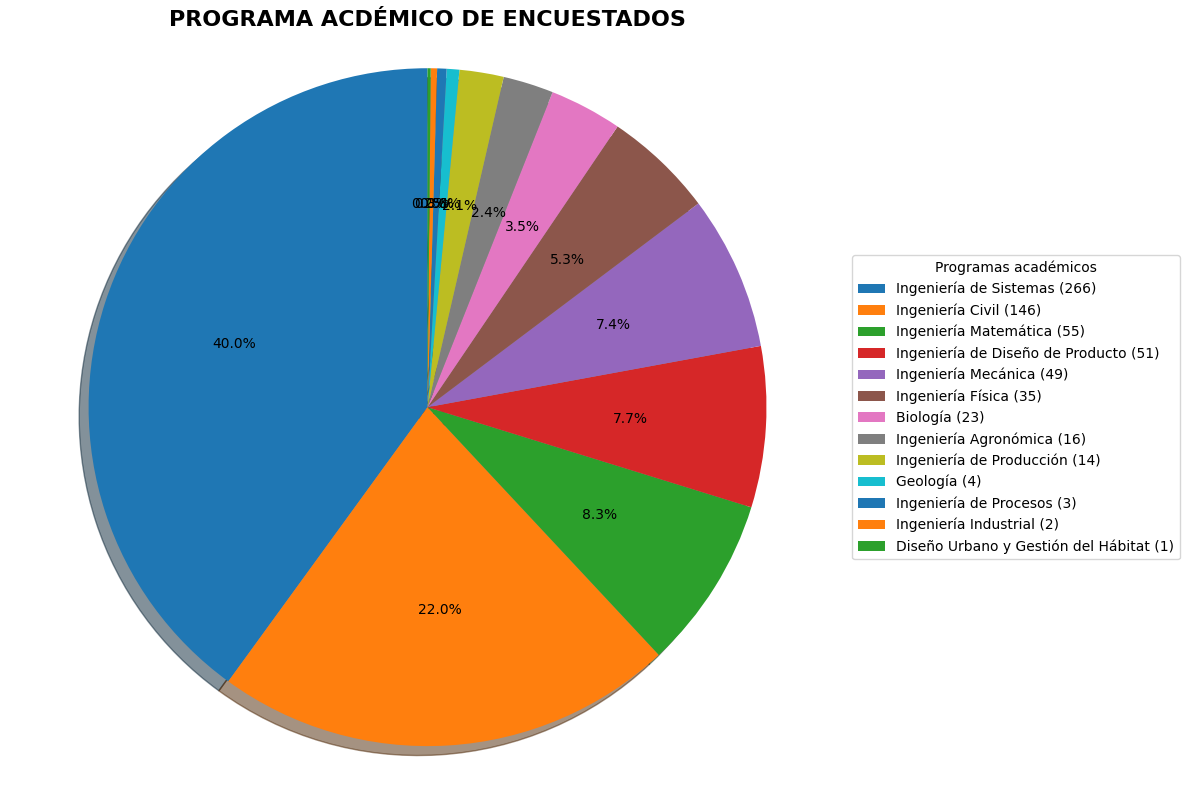

In [ ]:
#TERCERA VARIABLE A DESCRIBIR: PROGRAMA ACADÉMICO *BARRAS*

past_prog = dfpre2['Programa académico'].value_counts()
print('\n\n')

# --- Graficamos el pastel con leyenda externa, por la cantidad de valores observados ---
fig, ax = plt.subplots(figsize=(12, 8)) # Ajuste del tamaño de la figura en esta línea.

wedges, texts, autotexts = plt.pie(
    past_prog.values,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    #explode=[0.1] + [0] * (len(past_gen) - 1) # Asegura el explode correcto
)
plt.title('PROGRAMA ACDÉMICO DE ENCUESTADOS', fontweight = 'bold', fontsize=16)
# Crear las etiquetas de la leyenda con el nombre y el porcentaje
# Zip junta los nombres de las categorías (índice de past_gen) con los porcentajes de autopct
# autotexts.get_text() te da el texto del porcentaje que se mostró en el pie.
legend_label_prog = [f"{label} ({val})" for label, val in zip(past_prog.index, past_prog.values)]

#Agregar la leyenda fuera del gráfico
# bbox_to_anchor es clave para posicionar la leyenda fuera del área del gráfico
plt.legend(wedges, legend_label_prog,
           title="Programas académicos",
           loc="center left", # Posiciona la leyenda a la izquierda
           bbox_to_anchor=(1, 0, 0.5, 1)) # Ajusta (x, y, ancho, alto) del cuadro de leyenda

plt.axis('equal') # Asegura que el pastel sea circular
plt.tight_layout() # Ajusta el layout para que la leyenda no se corte
plt.ylabel('') # Borramos la etiqueta de y
plt.show()

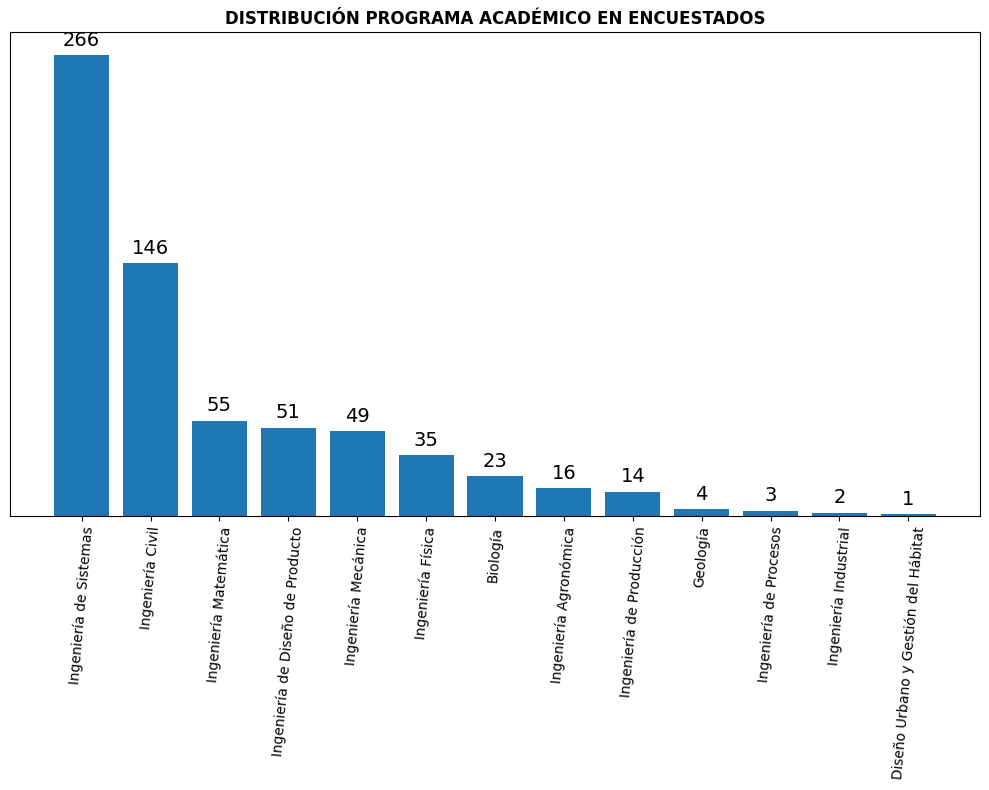

In [ ]:
#TERCERA VARIABLE A DESCRIBIR: PROGRAMA ACADÉMICO *BARRAS*

bar_prog = dfpre2['Programa académico'].value_counts()
print('\n\n')

fig, ax = plt.subplots(figsize=(10, 8)) # Ajuste del tamaño de la figura en esta línea.

bars3 = ax.bar(bar_prog.index, bar_prog.values) #Construcción de gráfico de barras.

#Quitar las marcas del eje y
ax.yaxis.set_visible(True)
#Dejar la línea y los guiones pequeños solamente
ax.set_yticks([])
ax.set_yticklabels([])
plt.xticks(rotation=85)

#Mostrar valores como etiquetas en la parte superior del gráfico.
ax.bar_label(bars3, fmt='%d', padding=4, fontsize=14, color='black')

plt.title('DISTRIBUCIÓN PROGRAMA ACADÉMICO EN ENCUESTADOS', fontweight = 'bold')
plt.tight_layout()
plt.show()

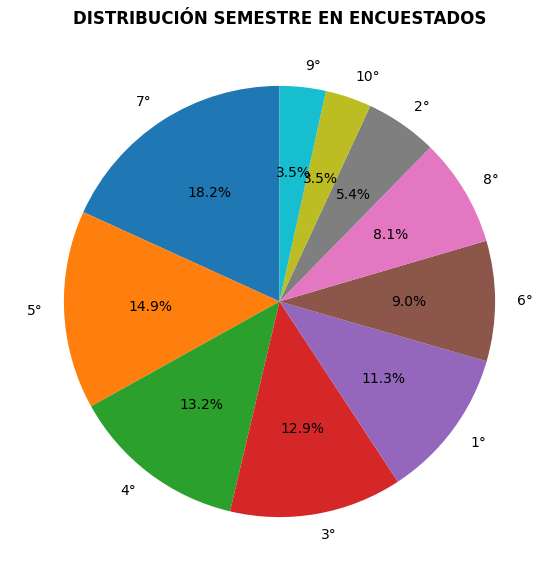

In [ ]:
#CUARTA VARIABLE A DESCRIBIR: SEMESTRE *PASTEL*

past_sem = dfpre2['Semestre más avanzado que estás cursando'].value_counts()

print('\n\n')
# --- Graficamos el pastel con mejoras ---
plt.figure(figsize=(7, 7)) # Hacemos el gráfico más grande y cuadrado para que se vea bien

past_sem.plot.pie(
    autopct='%1.1f%%',  # Formato para mostrar porcentajes con un decimal. Ej: '37.5%'
    startangle=90,      # Inicia el primer trozo en la parte superior (90 grados)
    shadow=False,        # Añade una ligera sombra para un efecto 3D
    #explode=(0.1, 0.1, 0.1) # "Explota" o separa ligeramente el primer trozo (el más grande)
)
plt.title('DISTRIBUCIÓN SEMESTRE EN ENCUESTADOS', fontweight = 'bold')
plt.ylabel('') # Borramos la etiqueta de y
plt.show()



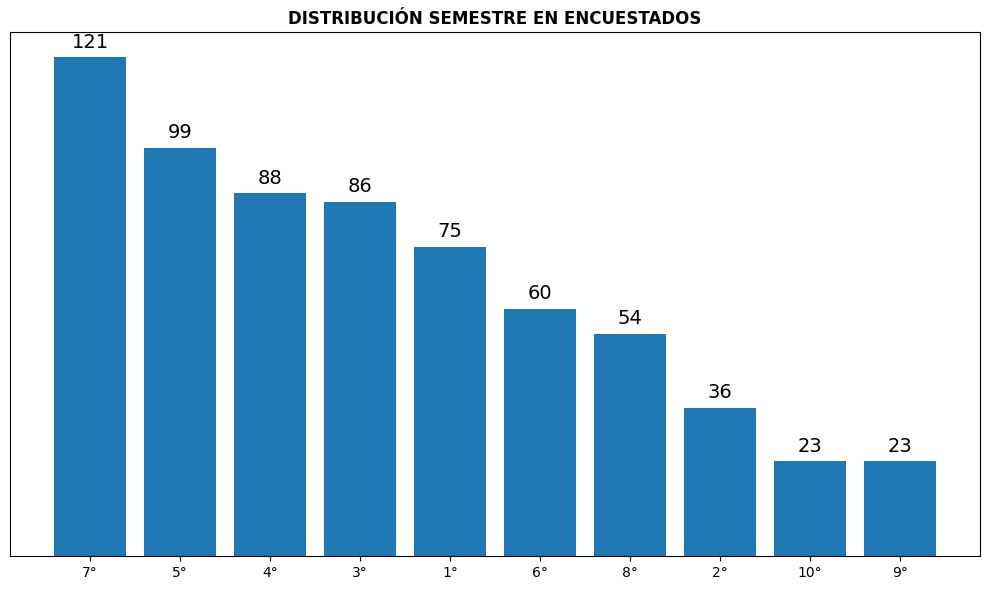

In [ ]:
#CUARTA VARIABLE A DESCRIBIR: SEMESTRE *BARRAS*

bar_sem = dfpre2['Semestre más avanzado que estás cursando'].value_counts() #Conteo de cada categoría.

fig, ax = plt.subplots(figsize=(10, 6)) # Ajuste del tamaño de la figura en esta línea.

bars4 = ax.bar(bar_sem.index, bar_sem.values) #Construcción de gráfico de barras.

#Quitar las marcas del eje y
ax.yaxis.set_visible(True)
#Dejar la línea y los guiones pequeños solamente
ax.set_yticks([])
ax.set_yticklabels([])

#Mostrar valores como etiquetas en la parte superior del gráfico.
ax.bar_label(bars4, fmt='%d', padding=4, fontsize=14, color='black')

plt.title('DISTRIBUCIÓN SEMESTRE EN ENCUESTADOS', fontweight = 'bold')
plt.tight_layout()
plt.show()


#3. CODIFICACION DE LAS RESPUESTAS CATEGORICAS EN LAS DISTINTAS CARACTERISTICAS CON CONDICIÓN:

*BINARIAS

*CATEGORIAS DE NIVEL DE EDUCACION

*ESCALA DE LIKERT

In [ ]:
#Creación del objeto para la conversión de escala a número.

conv_like ={
    'Totalmente en desacuerdo': 1,
    'Totalmente en desacuerdo\t': 1,
    'Totalmente en desacuerdo\t	': 1,
    'En desacuerdo': 2,
    'En desacuerdo\t': 2,
    'En desacuerdo\t	': 2,
    'Ni de acuerdo, ni en desacuerdo': 3,
    'De acuerdo': 4,
    'De acuerdo\t': 4,
    'De acuerdo\t	': 4,
    'Totalmente de acuerdo': 5
}

#Creación de lista para seleccionar las columnas a convertir.
colum_trans = dfpre2.columns[8:72]

In [ ]:
# Revisar como quedaron los indices de las columnas en dfpre2 para prevenir una
# mala selección
for i, col in enumerate(dfpre2.columns):
  print(F"[{i}] -> {col}")

[0] -> ID de respuesta
[1] -> Edad en años (solo números sin espacio)
[2] -> Sexo biológico
[3] -> Programa académico
[4] -> Semestre más avanzado que estás cursando
[5] -> ¿Tienes algún tipo de beca para realizar tus estudios?
[6] -> Máximo nivel educativo de Madre o tutora
[7] -> Máximo nivel educativo de Padre o tutor
[8] -> Selecciona la opción más afín respecto a tus cursos STEM (Ciencia, Tecnología, Ingeniería y Matemáticas, por sus siglas en inglés).

No hay respuestas correctas o incorrectas. - 1. Confío en mi habilidad para aprender el material de mis cursos.
[9] -> Selecciona la opción más afín respecto a tus cursos STEM (Ciencia, Tecnología, Ingeniería y Matemáticas, por sus siglas en inglés).

No hay respuestas correctas o incorrectas. - 2. Tengo la capacidad de aprender el material de mis cursos.
[10] -> Selecciona la opción más afín respecto a tus cursos STEM (Ciencia, Tecnología, Ingeniería y Matemáticas, por sus siglas en inglés).

No hay respuestas correctas o incorrec

In [ ]:
#Visualizar los valores con columnas con índices 72 a 74
dfpre2.iloc[:, 72:75].tail(5)

,1. ¿Cuál de las siguientes siete figuras describe mejor la compatibilidad entre tu género y tu programa académico?,2. ¿Cuál de las siguientes siete figuras describe qué tan compatible piensas que eres tú como persona con estar en un programa en áreas STEM?,3. ¿Cuál de las siguientes siete figuras describe mejor la compatibilidad entre tu género y STEM?
985,3.0,6.0,5.0
987,2.0,4.0,6.0
988,5.0,3.0,3.0
999,1.0,4.0,7.0
1003,4.0,5.0,5.0


In [ ]:
#Una vez que comprobé los valores con punto flotante los pasaré a tipo entero.
#dfpre2.iloc[:, 72:75] = dfpre2.iloc[:, 72:75].astype(int)
#dfpre2.iloc[:, 72:75].dtypes
#dfpre2.iloc[:, 72:75].tail(5)
#print(dfpre2.iloc[:, 72:75].isna().sum())
for col in dfpre2.columns[72:75]:
    dfpre2[col] = dfpre2[col].astype(int)

In [ ]:
#Prueba conversión Columnas de escala Likert
dfpre3 = dfpre2.copy()
dfpre3[colum_trans] = dfpre3[colum_trans].replace(conv_like)
dfpre3.tail(5)
#dfpre3[colum_trans].head(5)
#dfpre3['Selecciona la opción más afín contigo, con la mayor honestidad posible. \nNo hay respuestas correctas o incorrectas. - 5. He considerado cambiarme a un programa que NO sea de áreas STEM.']

/tmp/ipython-input-16-1529070001.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfpre3[colum_trans] = dfpre3[colum_trans].replace(conv_like)


,ID de respuesta,Edad en años (solo números sin espacio),Sexo biológico,Programa académico,Semestre más avanzado que estás cursando,¿Tienes algún tipo de beca para realizar tus estudios?,Máximo nivel educativo de Madre o tutora,Máximo nivel educativo de Padre o tutor,"Selecciona la opción más afín respecto a tus cursos STEM (Ciencia, Tecnología, Ingeniería y Matemáticas, por sus siglas en inglés).\n\nNo hay respuestas correctas o incorrectas. - 1. Confío en mi habilidad para aprender el material de mis cursos.","Selecciona la opción más afín respecto a tus cursos STEM (Ciencia, Tecnología, Ingeniería y Matemáticas, por sus siglas en inglés).\n\nNo hay respuestas correctas o incorrectas. - 2. Tengo la capacidad de aprender el material de mis cursos.",...,Valora la veracidad de las siguientes afirmaciones considerando tus perspectivas sobre las áreas STEM.\n\nNo hay respuestas correctas o incorrectas. - 7. Siento que tendría algo de qué enorgullecerme al ejercer una profesión en áreas STEM.,Valora la veracidad de las siguientes afirmaciones considerando tus perspectivas sobre las áreas STEM.\n\nNo hay respuestas correctas o incorrectas. - 8. Trabajar en áreas STEM no sería una pérdida de mi tiempo.,"Selecciona la opción más afín contigo, con la mayor honestidad posible. \nNo hay respuestas correctas o incorrectas. - 1. Es probable que me cambie a un programa que NO sea de áreas STEM.","Selecciona la opción más afín contigo, con la mayor honestidad posible. \nNo hay respuestas correctas o incorrectas. - 2. Probablemente no completaré mis estudios o no me graduaré de mi programa STEM.","Selecciona la opción más afín contigo, con la mayor honestidad posible. \nNo hay respuestas correctas o incorrectas. - 3. Tengo la intención de abandonar mi programa STEM antes de graduarme o completar mis estudios.","Selecciona la opción más afín contigo, con la mayor honestidad posible. \nNo hay respuestas correctas o incorrectas. - 4. No me quedaré en mi programa o en alguna área STEM.","Selecciona la opción más afín contigo, con la mayor honestidad posible. \nNo hay respuestas correctas o incorrectas. - 5. He considerado cambiarme a un programa que NO sea de áreas STEM.",1. ¿Cuál de las siguientes siete figuras describe mejor la compatibilidad entre tu género y tu programa académico?,2. ¿Cuál de las siguientes siete figuras describe qué tan compatible piensas que eres tú como persona con estar en un programa en áreas STEM?,3. ¿Cuál de las siguientes siete figuras describe mejor la compatibilidad entre tu género y STEM?
985,R_7AHK8qFSsQXBGHG,20.0,Mujer,Ingeniería de Sistemas,7°,Sí,Profesional,Secundaria,4,4,...,5,5,1,1,1,1,1,3,6,5
987,R_1uMojiqBwrJaHy9,21.0,Mujer,Ingeniería de Sistemas,7°,Sí,Secundaria,Secundaria,3,4,...,5,5,1,1,1,1,1,2,4,6
988,R_1WTqF4qHQb3RKkc,19.0,Mujer,Ingeniería de Sistemas,3°,No,Especialización,Secundaria,5,5,...,4,4,2,1,1,1,2,5,3,3
999,R_1wvK9stxlNktbQ4,25.0,Hombre,Ingeniería de Sistemas,10°,No,Secundaria,Técnica,3,4,...,5,1,3,4,3,1,1,1,4,7
1003,R_1fkleNsvlhYhsLL,18.0,Mujer,Ingeniería de Sistemas,1°,No,Tecnológica,Profesional,5,4,...,4,4,2,2,2,2,4,4,5,5


In [ ]:
# Revisar como quedaron los indices de las columnas en dfpre3
for i, col in enumerate(dfpre3.columns):
  print(F"[{i}] -> {col}")

[0] -> ID de respuesta
[1] -> Edad en años (solo números sin espacio)
[2] -> Sexo biológico
[3] -> Programa académico
[4] -> Semestre más avanzado que estás cursando
[5] -> ¿Tienes algún tipo de beca para realizar tus estudios?
[6] -> Máximo nivel educativo de Madre o tutora
[7] -> Máximo nivel educativo de Padre o tutor
[8] -> Selecciona la opción más afín respecto a tus cursos STEM (Ciencia, Tecnología, Ingeniería y Matemáticas, por sus siglas en inglés).

No hay respuestas correctas o incorrectas. - 1. Confío en mi habilidad para aprender el material de mis cursos.
[9] -> Selecciona la opción más afín respecto a tus cursos STEM (Ciencia, Tecnología, Ingeniería y Matemáticas, por sus siglas en inglés).

No hay respuestas correctas o incorrectas. - 2. Tengo la capacidad de aprender el material de mis cursos.
[10] -> Selecciona la opción más afín respecto a tus cursos STEM (Ciencia, Tecnología, Ingeniería y Matemáticas, por sus siglas en inglés).

No hay respuestas correctas o incorrec

In [ ]:
#Eliminación de la columna de identificadores de respuesta
dfpre3 = dfpre3.drop(columns = ['ID de respuesta'])

In [ ]:
# Conversión de la pregunta de género a valores numéricos que representen las tres opciones de respuesta.
dfpre3['Sexo biológico'] = dfpre3['Sexo biológico'].replace({'Hombre': 0, 'Mujer': 1, 'Prefiero no contestar': 2})
dfpre3.tail()

/tmp/ipython-input-18-340623746.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfpre3['Sexo biológico'] = dfpre3['Sexo biológico'].replace({'Hombre': 0, 'Mujer': 1, 'Prefiero no contestar': 2})


,Edad en años (solo números sin espacio),Sexo biológico,Programa académico,Semestre más avanzado que estás cursando,¿Tienes algún tipo de beca para realizar tus estudios?,Máximo nivel educativo de Madre o tutora,Máximo nivel educativo de Padre o tutor,"Selecciona la opción más afín respecto a tus cursos STEM (Ciencia, Tecnología, Ingeniería y Matemáticas, por sus siglas en inglés).\n\nNo hay respuestas correctas o incorrectas. - 1. Confío en mi habilidad para aprender el material de mis cursos.","Selecciona la opción más afín respecto a tus cursos STEM (Ciencia, Tecnología, Ingeniería y Matemáticas, por sus siglas en inglés).\n\nNo hay respuestas correctas o incorrectas. - 2. Tengo la capacidad de aprender el material de mis cursos.","Selecciona la opción más afín respecto a tus cursos STEM (Ciencia, Tecnología, Ingeniería y Matemáticas, por sus siglas en inglés).\n\nNo hay respuestas correctas o incorrectas. - 3. Soy capaz de lograr mis metas en mis cursos.",...,Valora la veracidad de las siguientes afirmaciones considerando tus perspectivas sobre las áreas STEM.\n\nNo hay respuestas correctas o incorrectas. - 7. Siento que tendría algo de qué enorgullecerme al ejercer una profesión en áreas STEM.,Valora la veracidad de las siguientes afirmaciones considerando tus perspectivas sobre las áreas STEM.\n\nNo hay respuestas correctas o incorrectas. - 8. Trabajar en áreas STEM no sería una pérdida de mi tiempo.,"Selecciona la opción más afín contigo, con la mayor honestidad posible. \nNo hay respuestas correctas o incorrectas. - 1. Es probable que me cambie a un programa que NO sea de áreas STEM.","Selecciona la opción más afín contigo, con la mayor honestidad posible. \nNo hay respuestas correctas o incorrectas. - 2. Probablemente no completaré mis estudios o no me graduaré de mi programa STEM.","Selecciona la opción más afín contigo, con la mayor honestidad posible. \nNo hay respuestas correctas o incorrectas. - 3. Tengo la intención de abandonar mi programa STEM antes de graduarme o completar mis estudios.","Selecciona la opción más afín contigo, con la mayor honestidad posible. \nNo hay respuestas correctas o incorrectas. - 4. No me quedaré en mi programa o en alguna área STEM.","Selecciona la opción más afín contigo, con la mayor honestidad posible. \nNo hay respuestas correctas o incorrectas. - 5. He considerado cambiarme a un programa que NO sea de áreas STEM.",1. ¿Cuál de las siguientes siete figuras describe mejor la compatibilidad entre tu género y tu programa académico?,2. ¿Cuál de las siguientes siete figuras describe qué tan compatible piensas que eres tú como persona con estar en un programa en áreas STEM?,3. ¿Cuál de las siguientes siete figuras describe mejor la compatibilidad entre tu género y STEM?
985,20.0,1,Ingeniería de Sistemas,7°,Sí,Profesional,Secundaria,4,4,4,...,5,5,1,1,1,1,1,3,6,5
987,21.0,1,Ingeniería de Sistemas,7°,Sí,Secundaria,Secundaria,3,4,3,...,5,5,1,1,1,1,1,2,4,6
988,19.0,1,Ingeniería de Sistemas,3°,No,Especialización,Secundaria,5,5,5,...,4,4,2,1,1,1,2,5,3,3
999,25.0,0,Ingeniería de Sistemas,10°,No,Secundaria,Técnica,3,4,3,...,5,1,3,4,3,1,1,1,4,7
1003,18.0,1,Ingeniería de Sistemas,1°,No,Tecnológica,Profesional,5,4,4,...,4,4,2,2,2,2,4,4,5,5


In [ ]:
#Conversión variable binaria característica de las becas.
dfpre3['¿Tienes algún tipo de beca para realizar tus estudios?'] = dfpre3['¿Tienes algún tipo de beca para realizar tus estudios?'].replace({'Sí': 1, 'No': 0})
#dfpre3.tail()

/tmp/ipython-input-19-1161431951.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfpre3['¿Tienes algún tipo de beca para realizar tus estudios?'] = dfpre3['¿Tienes algún tipo de beca para realizar tus estudios?'].replace({'Sí': 1, 'No': 0})


In [ ]:
#El dataframe dfpre3 contiene las primeras transformaciones de escala likert
#y género Se convertirán ahora las variables:
# Semestre más avanzado que estás cursando | Máximo nivel educativo de Madre
#o tutora | Máximo nivel educativo de Padre o tutor

#Crear objeto para variable Semestre más avanzado que estás cursando

conv_sem = {
    '1°': 1,
    '2°': 2,
    '3°': 3,
    '4°': 4,
    '5°': 5,
    '6°': 6,
    '7°': 7,
    '8°': 8,
    '9°': 9,
    '10°': 10
}

#Crear Objeto para variable Máximo nivel educativo de Madre/Padre o tutor(a)

conv_tut = {
    'No tengo padre y/o tutor': 0,
    'No tengo madre y/o tutora': 0,
    'Ninguno': 1,
    'Primaria': 2,
    'Secundaria': 3,
    'Técnica':4,
    'Tecnológica': 5,
    'Profesional': 6,
    'Especialización': 7,
    'Maestría': 8,
    'Doctorado': 9
}

In [ ]:
#Se convertirán ahora las variables: en numéricas por ser ordinales
# Semestre más avanzado que estás cursando | Máximo nivel educativo de Madre
#o tutora | Máximo nivel educativo de Padre o tutor

dfpre3['Semestre más avanzado que estás cursando'] = dfpre3['Semestre más avanzado que estás cursando'].replace(conv_sem).infer_objects(copy=False)
dfpre3['Máximo nivel educativo de Madre o tutora'] = dfpre3['Máximo nivel educativo de Madre o tutora'].replace(conv_tut)
dfpre3['Máximo nivel educativo de Padre o tutor'] = dfpre3['Máximo nivel educativo de Padre o tutor'].replace(conv_tut)
#dfpre3.tail()

/tmp/ipython-input-21-2886268128.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfpre3['Semestre más avanzado que estás cursando'] = dfpre3['Semestre más avanzado que estás cursando'].replace(conv_sem).infer_objects(copy=False)
/tmp/ipython-input-21-2886268128.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfpre3['Máximo nivel educativo de Madre o tutora'] = dfpre3['Máximo nivel educativo de Madre o tutora'].replace(conv_tut)
/tmp/ipython-input-21-2886268128.py:7: FutureWarning: Downcasting behavior in `replace` is depre

,Edad en años (solo números sin espacio),Sexo biológico,Programa académico,Semestre más avanzado que estás cursando,¿Tienes algún tipo de beca para realizar tus estudios?,Máximo nivel educativo de Madre o tutora,Máximo nivel educativo de Padre o tutor,"Selecciona la opción más afín respecto a tus cursos STEM (Ciencia, Tecnología, Ingeniería y Matemáticas, por sus siglas en inglés).\n\nNo hay respuestas correctas o incorrectas. - 1. Confío en mi habilidad para aprender el material de mis cursos.","Selecciona la opción más afín respecto a tus cursos STEM (Ciencia, Tecnología, Ingeniería y Matemáticas, por sus siglas en inglés).\n\nNo hay respuestas correctas o incorrectas. - 2. Tengo la capacidad de aprender el material de mis cursos.","Selecciona la opción más afín respecto a tus cursos STEM (Ciencia, Tecnología, Ingeniería y Matemáticas, por sus siglas en inglés).\n\nNo hay respuestas correctas o incorrectas. - 3. Soy capaz de lograr mis metas en mis cursos.",...,Valora la veracidad de las siguientes afirmaciones considerando tus perspectivas sobre las áreas STEM.\n\nNo hay respuestas correctas o incorrectas. - 7. Siento que tendría algo de qué enorgullecerme al ejercer una profesión en áreas STEM.,Valora la veracidad de las siguientes afirmaciones considerando tus perspectivas sobre las áreas STEM.\n\nNo hay respuestas correctas o incorrectas. - 8. Trabajar en áreas STEM no sería una pérdida de mi tiempo.,"Selecciona la opción más afín contigo, con la mayor honestidad posible. \nNo hay respuestas correctas o incorrectas. - 1. Es probable que me cambie a un programa que NO sea de áreas STEM.","Selecciona la opción más afín contigo, con la mayor honestidad posible. \nNo hay respuestas correctas o incorrectas. - 2. Probablemente no completaré mis estudios o no me graduaré de mi programa STEM.","Selecciona la opción más afín contigo, con la mayor honestidad posible. \nNo hay respuestas correctas o incorrectas. - 3. Tengo la intención de abandonar mi programa STEM antes de graduarme o completar mis estudios.","Selecciona la opción más afín contigo, con la mayor honestidad posible. \nNo hay respuestas correctas o incorrectas. - 4. No me quedaré en mi programa o en alguna área STEM.","Selecciona la opción más afín contigo, con la mayor honestidad posible. \nNo hay respuestas correctas o incorrectas. - 5. He considerado cambiarme a un programa que NO sea de áreas STEM.",1. ¿Cuál de las siguientes siete figuras describe mejor la compatibilidad entre tu género y tu programa académico?,2. ¿Cuál de las siguientes siete figuras describe qué tan compatible piensas que eres tú como persona con estar en un programa en áreas STEM?,3. ¿Cuál de las siguientes siete figuras describe mejor la compatibilidad entre tu género y STEM?
985,20.0,1,Ingeniería de Sistemas,7,1,6,3,4,4,4,...,5,5,1,1,1,1,1,3,6,5
987,21.0,1,Ingeniería de Sistemas,7,1,3,3,3,4,3,...,5,5,1,1,1,1,1,2,4,6
988,19.0,1,Ingeniería de Sistemas,3,0,7,3,5,5,5,...,4,4,2,1,1,1,2,5,3,3
999,25.0,0,Ingeniería de Sistemas,10,0,3,4,3,4,3,...,5,1,3,4,3,1,1,1,4,7
1003,18.0,1,Ingeniería de Sistemas,1,0,5,6,5,4,4,...,4,4,2,2,2,2,4,4,5,5


In [ ]:
#El dataframe dfpre3 contiene las primeras transformaciones de escala likert y genero
#Se creará el dfpre4 para incluir dummy variables en la variables categóricas
dfpre4 = dfpre3.copy()

In [ ]:
#Agregar las >Dummy Variables para la Variable categórica.

#En primer lugar crear el Objeto que me permita seleccionar la columna a transformar

col_dumis = [
    'Programa académico'
]

In [ ]:
#Agregar las >Dummy Variables para la Variable categórica.

#Aplicar OneHotEncoding y reemplazar las columnas originales.
dfpre4 = pd.get_dummies(dfpre4, columns=col_dumis, prefix_sep='_', drop_first=False)

#Quitar los valore booleanos y solo permitir valores numéricos.
cols_bool = dfpre4.select_dtypes(include='bool').columns
dfpre4[cols_bool] = dfpre4[cols_bool].astype(int)


In [ ]:
print(dfpre4.shape)
dfpre4.tail()

(665, 86)


,Edad en años (solo números sin espacio),Sexo biológico,Semestre más avanzado que estás cursando,¿Tienes algún tipo de beca para realizar tus estudios?,Máximo nivel educativo de Madre o tutora,Máximo nivel educativo de Padre o tutor,"Selecciona la opción más afín respecto a tus cursos STEM (Ciencia, Tecnología, Ingeniería y Matemáticas, por sus siglas en inglés).\n\nNo hay respuestas correctas o incorrectas. - 1. Confío en mi habilidad para aprender el material de mis cursos.","Selecciona la opción más afín respecto a tus cursos STEM (Ciencia, Tecnología, Ingeniería y Matemáticas, por sus siglas en inglés).\n\nNo hay respuestas correctas o incorrectas. - 2. Tengo la capacidad de aprender el material de mis cursos.","Selecciona la opción más afín respecto a tus cursos STEM (Ciencia, Tecnología, Ingeniería y Matemáticas, por sus siglas en inglés).\n\nNo hay respuestas correctas o incorrectas. - 3. Soy capaz de lograr mis metas en mis cursos.","Selecciona la opción más afín respecto a tus cursos STEM (Ciencia, Tecnología, Ingeniería y Matemáticas, por sus siglas en inglés).\n\nNo hay respuestas correctas o incorrectas. - 4. Me siento capaz de desempeñarme adecuadamente en mis cursos.",...,Programa académico_Ingeniería Agronómica,Programa académico_Ingeniería Civil,Programa académico_Ingeniería Física,Programa académico_Ingeniería Industrial,Programa académico_Ingeniería Matemática,Programa académico_Ingeniería Mecánica,Programa académico_Ingeniería de Diseño de Producto,Programa académico_Ingeniería de Procesos,Programa académico_Ingeniería de Producción,Programa académico_Ingeniería de Sistemas
985,20.0,1,7,1,6,3,4,4,4,5,...,0,0,0,0,0,0,0,0,0,1
987,21.0,1,7,1,3,3,3,4,3,3,...,0,0,0,0,0,0,0,0,0,1
988,19.0,1,3,0,7,3,5,5,5,5,...,0,0,0,0,0,0,0,0,0,1
999,25.0,0,10,0,3,4,3,4,3,2,...,0,0,0,0,0,0,0,0,0,1
1003,18.0,1,1,0,5,6,5,4,4,4,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
dfpre4.dtypes.value_counts()
dfpre4.shape

(665, 86)

# ojo OMITIR 23jun 19:31 no correr esta sección **DIVIDIR EL DATAFRAME EN:**

-LAS VARIABLES QUE FUNCIONAN CON LA ESCALA DE LICKERT.

-LAS VARIABLES QUE TRABAJAN CON ONE HOT ENCODING.


In [ ]:
# De la tabla 'dfpre4' tomar las columnas que trabajan con la escala de lickert.

df_lik = dfpre4.iloc[:, 4:71] #Seleccionar las columnas desde la posición 4 hasta la 70
print(df_lik.shape)

(665, 67)


In [ ]:
# De la tabla 'dfpre4' tomar las columnas que trabajan con One Hot Encoding (dummies).

df_dum = dfpre4.drop(dfpre4.columns[4:71], axis=1)
print(df_dum.shape)

(665, 46)


In [ ]:
df_dum = df_dum.drop(df_dum.columns[0], axis=1)
print(df_dum.shape)

(665, 45)


In [ ]:
df_dum.tail()

,Edad en años (solo números sin espacio),Sexo biológico,¿Tienes algún tipo de beca para realizar tus estudios?,Programa académico_Biología,Programa académico_Diseño Urbano y Gestión del Hábitat,Programa académico_Geología,Programa académico_Ingeniería Agronómica,Programa académico_Ingeniería Civil,Programa académico_Ingeniería Física,Programa académico_Ingeniería Industrial,...,Máximo nivel educativo de Padre o tutor_Doctorado,Máximo nivel educativo de Padre o tutor_Especialización,Máximo nivel educativo de Padre o tutor_Maestría,Máximo nivel educativo de Padre o tutor_Ninguno,Máximo nivel educativo de Padre o tutor_No tengo padre y/o tutor,Máximo nivel educativo de Padre o tutor_Primaria,Máximo nivel educativo de Padre o tutor_Profesional,Máximo nivel educativo de Padre o tutor_Secundaria,Máximo nivel educativo de Padre o tutor_Tecnológica,Máximo nivel educativo de Padre o tutor_Técnica
985,20.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
987,21.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
988,19.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
999,25.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1003,18.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#4. PREPARACIÓN DEL DATAFRAME 'dfpre4' PARA SER UTILIZADO EN LOS MODELOS DE ANÁLISIS Y APRENDIZAJE AUTOMÁTICO

## 4.1. Nombres y clasificación de columnas por constructo.

In [ ]:
# Revisar los índices para organizar por constructo

In [ ]:
# Revisar como quedaron los indices de las columnas en dfpre4
for i, col in enumerate(dfpre4.columns):
  print(F"[{i}] -> {col}")

[0] -> Edad en años (solo números sin espacio)
[1] -> Sexo biológico
[2] -> Semestre más avanzado que estás cursando
[3] -> ¿Tienes algún tipo de beca para realizar tus estudios?
[4] -> Máximo nivel educativo de Madre o tutora
[5] -> Máximo nivel educativo de Padre o tutor
[6] -> Selecciona la opción más afín respecto a tus cursos STEM (Ciencia, Tecnología, Ingeniería y Matemáticas, por sus siglas en inglés).

No hay respuestas correctas o incorrectas. - 1. Confío en mi habilidad para aprender el material de mis cursos.
[7] -> Selecciona la opción más afín respecto a tus cursos STEM (Ciencia, Tecnología, Ingeniería y Matemáticas, por sus siglas en inglés).

No hay respuestas correctas o incorrectas. - 2. Tengo la capacidad de aprender el material de mis cursos.
[8] -> Selecciona la opción más afín respecto a tus cursos STEM (Ciencia, Tecnología, Ingeniería y Matemáticas, por sus siglas en inglés).

No hay respuestas correctas o incorrectas. - 3. Soy capaz de lograr mis metas en mis cur

In [ ]:
#Colocar nombres más cortos a las variables para que no queden como las
#Preguntas originales de la encuesta

dfpre5 = dfpre4.copy()

#Creación de objeto con los nombres nuevos para las variables

nue_nom_var = [
    "EDAD", "SEXO", "SEMESTRE", "BECA", "TUTORAM", "TUTORH", "AUTOEFICACIA_1",
    "AUTOEFICACIA_2", "AUTOEFICACIA_3", "AUTOEFICACIA_4", "AUTOREGU_1",
    "AUTOREGU_2", "AUTOREGU_3", "AUTOREGU_4", "AUTOREGU_5", "AUTOREGU_6",
    "INTR_1", "INTR_2", "INTR_3", "INTR_4", "EXTR_1", "EXTR_2", "EXTR_3",
    "EXTR_4", "AUTOEFICACIA_5", "AUTOEFICACIA_6", "AUTOEFICACIA_7",
    "AUTOEFICACIA_8", "AUTOEFICACIA_9", "PERTPRO_1", "PERTPRO_2", "PERTPRO_3",
    "PERTPRO_4", "PERTPRO_5", "PERTPRO_6", "PERTPRO_7", "PERTPRO_8",
    "PERTSTEM_1", "PERTSTEM_2", "PERTSTEM_3", "PERTSTEM_4", "COMPROMISO_1",
    "COMPROMISO_2", "COMPROMISO_3", "COMPROMISO_4", "COMPROMISO_5",
    "EXPEMPLEO_1", "EXPEMPLEO_2", "EXPEMPLEO_3", "EXPEMPLEO_4", "EXPEXITO_1",
    "EXPEXITO_2", "EXPEXITO_3", "EXPEXITO_4", "EXPEXITO_5", "EXPEXITO_6",
    "EXPEXITO_7", "EXPVALPER_1", "EXPVALPER_2", "EXPVALPER_3", "EXPVALPER_4",
    "EXPVALPER_5", "EXPVALPER_6", "EXPVALPER_7", "EXPVALPER_8", "ABANDON_1",
    "ABANDON_2", "ABANDON_3", "ABANDON_4", "ABANDON_5", "CGENPROG",
    "CESTPROG", "CGENSTE", "BIOLOG", "DISEÑO", "GEOLOG", "IAGRON", "ICIVIL",
    "IFISIC", "IINDUS", "IMATEM", "IMECAN", "IDISPRO", "IPROCE", "IPRODU",
    "ISISTE"
]

dfpre5.columns = nue_nom_var
#


In [ ]:
print(dfpre5.columns)

Index(['EDAD', 'SEXO', 'SEMESTRE', 'BECA', 'TUTORAM', 'TUTORH',
       'AUTOEFICACIA_1', 'AUTOEFICACIA_2', 'AUTOEFICACIA_3', 'AUTOEFICACIA_4',
       'AUTOREGU_1', 'AUTOREGU_2', 'AUTOREGU_3', 'AUTOREGU_4', 'AUTOREGU_5',
       'AUTOREGU_6', 'INTR_1', 'INTR_2', 'INTR_3', 'INTR_4', 'EXTR_1',
       'EXTR_2', 'EXTR_3', 'EXTR_4', 'AUTOEFICACIA_5', 'AUTOEFICACIA_6',
       'AUTOEFICACIA_7', 'AUTOEFICACIA_8', 'AUTOEFICACIA_9', 'PERTPRO_1',
       'PERTPRO_2', 'PERTPRO_3', 'PERTPRO_4', 'PERTPRO_5', 'PERTPRO_6',
       'PERTPRO_7', 'PERTPRO_8', 'PERTSTEM_1', 'PERTSTEM_2', 'PERTSTEM_3',
       'PERTSTEM_4', 'COMPROMISO_1', 'COMPROMISO_2', 'COMPROMISO_3',
       'COMPROMISO_4', 'COMPROMISO_5', 'EXPEMPLEO_1', 'EXPEMPLEO_2',
       'EXPEMPLEO_3', 'EXPEMPLEO_4', 'EXPEXITO_1', 'EXPEXITO_2', 'EXPEXITO_3',
       'EXPEXITO_4', 'EXPEXITO_5', 'EXPEXITO_6', 'EXPEXITO_7', 'EXPVALPER_1',
       'EXPVALPER_2', 'EXPVALPER_3', 'EXPVALPER_4', 'EXPVALPER_5',
       'EXPVALPER_6', 'EXPVALPER_7', 'EXPVALPER_8', '

In [ ]:
#from enum import auto
#CLASIFICACIÓN DE COLUMNAS POR CONSTRUCTO

#CREACIÓN DE OBJETOS QUE AGRUPEN LAS COLUMNAS DE CADA CONSTRUCTO

#"""{1.AUTOEFICACIA, 2.AUTORREGULACION, 3.MOTIVACION INTRINSECA,
#4.MOTIVACION EXTRINSECA, 5.SENTIDO DE PERTENENCIA AL PROGRAMA,
#6.SENTIDO DE PERTENENCIA A STEM, 7.COMPROMISO ACADÉMICO
#,8.EXPECTATIVAS DE EMPLEO, 9.EXPECTATIVAS DE VALOR TENER ÉXITO EN STEM,
#10.EXPECTATIVAS DEL VALOR PERCIBIDO EN STEM,
#11.INTENCIÓN DE ABANDONAR,12.COMPATIBILIDAD GENERO-PROGRAMA,
#13.COMPATIBILIDAD ESTUDIANTE-STEM,14.COMPATIBILIDAD GENERO-STEM}"""

# 1. AUTOEFICACIA
autoeficacia_cols = ['AUTOEFICACIA_1', 'AUTOEFICACIA_2', 'AUTOEFICACIA_3', 'AUTOEFICACIA_4',
                     'AUTOEFICACIA_5', 'AUTOEFICACIA_6', 'AUTOEFICACIA_7', 'AUTOEFICACIA_8',
                     'AUTOEFICACIA_9']
# 2. AUTORREGULACION
autorregu_cols = ['AUTOREGU_1', 'AUTOREGU_2', 'AUTOREGU_3', 'AUTOREGU_4', 'AUTOREGU_5', 'AUTOREGU_6']

# 3. MOTIVACION INTRINSECA
motivintrinseca_cols = ['INTR_1', 'INTR_2', 'INTR_3', 'INTR_4']

# 4. MOTIVACION EXTRINSECA
motivoextrinseca_cols = ['EXTR_1', 'EXTR_2', 'EXTR_3', 'EXTR_4']

# 5. SENTIDO DE PERTENENCIA AL PROGRAMA
pertprograma_cols = ['PERTPRO_1', 'PERTPRO_2', 'PERTPRO_3', 'PERTPRO_4', 'PERTPRO_5', 'PERTPRO_6', 'PERTPRO_7', 'PERTPRO_8']

# 6. SENTIDO DE PERTENENCIA A STEM
pertstem_cols = ['PERTSTEM_1', 'PERTSTEM_2', 'PERTSTEM_3', 'PERTSTEM_4']

# 7. COMPROMISO ACADÉMICO
compracad_cols = ['COMPROMISO_1', 'COMPROMISO_2', 'COMPROMISO_3', 'COMPROMISO_4', 'COMPROMISO_5']

# 8. EXPECTATIVAS DE EMPLEO
expempleo_cols = ['EXPEMPLEO_1', 'EXPEMPLEO_2', 'EXPEMPLEO_3', 'EXPEMPLEO_4']

# 9. EXPECTATIVAS DE VALOR TENER ÉXITO EN STEM
expvalexit_cols = ['EXPEXITO_1', 'EXPEXITO_2', 'EXPEXITO_3', 'EXPEXITO_4', 'EXPEXITO_5', 'EXPEXITO_6', 'EXPEXITO_7']

# 10. EXPECTATIVAS DEL VALOR PERCIBIDO EN STEM
expvalper_cols = ['EXPVALPER_1', 'EXPVALPER_2', 'EXPVALPER_3', 'EXPVALPER_4', 'EXPVALPER_5', 'EXPVALPER_6', 'EXPVALPER_7', 'EXPVALPER_8']

# 11. INTENCIÓN DE ABANDONAR
abandona_cols = ['ABANDON_1', 'ABANDON_2', 'ABANDON_3', 'ABANDON_4', 'ABANDON_5']

# 12. COMPATIBILIDAD GENERO-PROGRAMA
compatgenprog_cols = ['CGENPROG']

# 13. COMPATIBILIDAD ESTUDIANTE-STEM
compatestud_cols = ['CESTPROG']

# 14. COMPATIBILIDAD GENERO-STEM
compatgen_cols = ['CGENSTE']

## 4.2. UTILIZACIÓN DEL ALFA DE CRONBACH

In [ ]:
#Alfa [1. AUTOEFICACIA]
autoef1 = dfpre5[autoeficacia_cols]
alfa1, _ = cronbach_alpha(data=autoef1)
#Alfa [2. AUTORREGULACION]
autorreg1 = dfpre5[autorregu_cols]
alfa2, _ = cronbach_alpha(data=autorreg1)
#Alfa [3. MOTIVACION INTRINSECA]
motivintrinseca1 = dfpre5[motivintrinseca_cols]
alfa3, _ = cronbach_alpha(data=motivintrinseca1)
#Alfa [4. MOTIVACION EXTRINSECA]
motivoextrinseca1 = dfpre5[motivoextrinseca_cols]
alfa4, _ = cronbach_alpha(data=motivoextrinseca1)
#Alfa [5. SENTIDO DE PERTENENCIA AL PROGRAMA]
pertprograma1 = dfpre5[pertprograma_cols]
alfa5, _ = cronbach_alpha(data=pertprograma1)
#Alfa [6. SENTIDO DE PERTENENCIA A STEM]
pertstem1 = dfpre5[pertstem_cols]
alfa6, _ = cronbach_alpha(data=pertstem1)
#Alfa [7. COMPROMISO ACADÉMICO]
compracad1 = dfpre5[compracad_cols]
alfa7, _ = cronbach_alpha(data=compracad1)
#Alfa [8. EXPECTATIVAS DE EMPLEO]
expempleo1 = dfpre5[expempleo_cols]
alfa8, _ = cronbach_alpha(data=expempleo1)
#Alfa [9. EXPECTATIVAS DE VALOR TENER ÉXITO EN STEM]
expvalexit1 = dfpre5[expvalexit_cols]
alfa9, _ = cronbach_alpha(data=expvalexit1)
#Alfa [10. EXPECTATIVAS DEL VALOR PERCIBIDO EN STEM]
expvalper1 = dfpre5[expvalper_cols]
alfa10, _ = cronbach_alpha(data=expvalper1)
#Alfa [11. INTENCIÓN DE ABANDONAR]
abandona1 = dfpre5[abandona_cols]
alfa11, _ = cronbach_alpha(data=abandona1)

#Los constructos 12, 13 y 14 sólo tienen una pregunta, por lo tanto no se
#requiere de aplicar un método para saber si hay coherencia entre varios.

#Alfa [12. COMPATIBILIDAD GENERO-PROGRAMA]
#compatgenprog1 = dfpre5[compatgenprog_cols]
#alfa12, _ = cronbach_alpha(data=compatgenprog1)
#Alfa [13. COMPATIBILIDAD ESTUDIANTE-STEM]
#compatestud1 = dfpre5[compatestud_cols]
#alfa13, _ = cronbach_alpha(data=compatestud1)
#Alfa [14. COMPATIBILIDAD GENERO-STEM]
#compatgen1 = dfpre5[compatgen_cols]
#alfa14, _ = cronbach_alpha(data=compatgen1)
print(f"Alfa de Cronbach para AUTOEFICACIA: {alfa1:.4f}")
print(f"Alfa de Cronbach para AUTORREGULACION: {alfa2:.4f}")
print(f"Alfa de Cronbach para MOTIVACION INTRINSECA: {alfa3:.4f}")
print(f"Alfa de Cronbach para MOTIVACION EXTRINSECA: {alfa4:.4f}")
print(f"Alfa de Cronbach para SENTIDO DE PERTENENCIA AL PROGRAMA: {alfa5:.4f}")
print(f"Alfa de Cronbach para SENTIDO DE PERTENENCIA A STEM: {alfa6:.4f}")
print(f"Alfa de Cronbach para COMPROMISO ACADÉMICO: {alfa7:.4f}")
print(f"Alfa de Cronbach para EXPECTATIVAS DE EMPLEO: {alfa8:.4f}")
print(f"Alfa de Cronbach para EXPECTATIVAS DE VALOR TENER ÉXITO EN STEM: {alfa9:.4f}")
print(f"Alfa de Cronbach para EXPECTATIVAS DEL VALOR PERCIBIDO EN STEM: {alfa10:.4f}")
print(f"Alfa de Cronbach para INTENCIÓN DE ABANDONAR: {alfa11:.4f}")
#print(f"Alfa de Cronbach para COMPATIBILIDAD GENERO-PROGRAMA: {alfa12:.4f}")
#print(f"Alfa de Cronbach para COMPATIBILIDAD ESTUDIANTE-STEM: {alfa13:.4f}")
#print(f"Alfa de Cronbach para COMPATIBILIDAD GENERO-STEM: {alfa14:.4f}")

Alfa de Cronbach para AUTOEFICACIA: 0.9286
Alfa de Cronbach para AUTORREGULACION: 0.7694
Alfa de Cronbach para MOTIVACION INTRINSECA: 0.7143
Alfa de Cronbach para MOTIVACION EXTRINSECA: 0.7938
Alfa de Cronbach para SENTIDO DE PERTENENCIA AL PROGRAMA: 0.8919
Alfa de Cronbach para SENTIDO DE PERTENENCIA A STEM: 0.9139
Alfa de Cronbach para COMPROMISO ACADÉMICO: 0.7872
Alfa de Cronbach para EXPECTATIVAS DE EMPLEO: 0.9412
Alfa de Cronbach para EXPECTATIVAS DE VALOR TENER ÉXITO EN STEM: 0.9428
Alfa de Cronbach para EXPECTATIVAS DEL VALOR PERCIBIDO EN STEM: 0.9347
Alfa de Cronbach para INTENCIÓN DE ABANDONAR: 0.9258


Todos los valores del alfa de cronbach muestran consistencia

α ≥ 0.70 → Aceptable

α ≥ 0.80 → Bueno

α ≥ 0.90 → Excelente

##4.3. Reducción de dimensionalidad por constructo

In [ ]:
#Los dataframe por constructo se denominan
#{autoef1, autorreg1, motivintrinseca1, motivoextrinseca1,
#pertprograma1, pertstem1, compracad1, expempleo1,
#expvalexit1, expvalper1, abandona1, compatgenprog1,
#compatestud1, compatgen1}

# [12. COMPATIBILIDAD GENERO-PROGRAMA]
compatgenprog1 = dfpre5[compatgenprog_cols]

# [13. COMPATIBILIDAD ESTUDIANTE-STEM]
compatestud1 = dfpre5[compatestud_cols]

# [14. COMPATIBILIDAD GENERO-STEM]
compatgen1 = dfpre5[compatgen_cols]


In [ ]:
# DESCARGA DE LIBRERIAS PARA LA REDUCCION DE DIMENSIONES

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Paso 1 asignación de variable constructo.
X1 = autoef1
X2 = autorreg1
X3 = motivintrinseca1
X4 = motivoextrinseca1
X5 = pertprograma1
X6 = pertstem1
X7 = compracad1
X8 = expempleo1
X9 = expvalexit1
X10 = expvalper1
X11 = abandona1
X12 = compatgenprog1
X13 = compatestud1
X14 = compatgen1

# Paso 2 Estandarizar las columnas con 'z'
scaler = StandardScaler()

# 2.1. Aplicar Z-score

X1S = scaler.fit_transform(X1)
X2S = scaler.fit_transform(X2)
X3S = scaler.fit_transform(X3)
X4S = scaler.fit_transform(X4)
X5S = scaler.fit_transform(X5)
X6S = scaler.fit_transform(X6)
X7S = scaler.fit_transform(X7)
X8S = scaler.fit_transform(X8)
X9S = scaler.fit_transform(X9)
X10S = scaler.fit_transform(X10)
X11S = scaler.fit_transform(X11)
X12S = scaler.fit_transform(X12)
X13S = scaler.fit_transform(X13)
X14S = scaler.fit_transform(X14)

# Paso 3 Aplicar el PCA para reducción de dimensiones
pca = PCA(n_components=1)

# Aplicar PCA a cada constructo
PC1 = pca.fit_transform(X1S)
PC2 = pca.fit_transform(X2S)
PC3 = pca.fit_transform(X3S)
PC4 = pca.fit_transform(X4S)
PC5 = pca.fit_transform(X5S)
PC6 = pca.fit_transform(X6S)
PC7 = pca.fit_transform(X7S)
PC8 = pca.fit_transform(X8S)
PC9 = pca.fit_transform(X9S)
PC10 = pca.fit_transform(X10S)
PC11 = pca.fit_transform(X11S)
PC12 = X12S
PC13 = X13S
PC14 = X14S

In [ ]:
# visualizar como quedaron los PCnn

#Opciones del arreglo de números Numpy para quitar la notación científica.
np.set_printoptions(precision=3, suppress=True)

#Mostrar en pantalla el arreglo resultante con la notación más adecuada.
print(PC10)

#

[[ 0.798]
 [-0.777]
 [-0.763]
 [ 2.734]
 [ 2.734]
 [ 2.734]
 [ 1.616]
 [-0.368]
 [ 2.734]
 [ 0.733]
 [-0.738]
 [ 1.954]
 [ 1.513]
 [ 0.442]
 [ 2.734]
 [-2.722]
 [ 2.389]
 [ 2.336]
 [-1.531]
 [ 0.419]
 [ 0.863]
 [-0.379]
 [ 0.455]
 [-1.184]
 [ 0.485]
 [ 1.606]
 [ 2.734]
 [-1.519]
 [-3.471]
 [-0.743]
 [-0.758]
 [-1.142]
 [-0.75 ]
 [-2.363]
 [ 1.162]
 [-6.504]
 [-1.486]
 [-0.368]
 [-0.422]
 [ 0.831]
 [ 2.734]
 [ 2.734]
 [-1.104]
 [ 2.325]
 [ 0.874]
 [ 1.921]
 [ 1.207]
 [ 2.734]
 [-0.368]
 [ 2.734]
 [ 2.734]
 [ 0.404]
 [-3.471]
 [ 2.734]
 [-3.815]
 [ 2.734]
 [ 1.951]
 [-1.486]
 [-1.172]
 [-0.777]
 [ 0.027]
 [ 2.734]
 [-0.024]
 [-0.368]
 [-2.256]
 [-9.675]
 [-3.471]
 [-4.25 ]
 [-0.368]
 [-2.722]
 [-1.449]
 [-2.276]
 [ 1.225]
 [-0.368]
 [-0.368]
 [ 2.319]
 [ 0.057]
 [ 1.255]
 [ 0.085]
 [-1.112]
 [-0.368]
 [ 2.389]
 [ 1.927]
 [-0.686]
 [ 2.734]
 [-0.368]
 [ 1.356]
 [ 2.734]
 [ 1.191]
 [ 1.185]
 [-0.446]
 [ 1.218]
 [ 2.734]
 [ 1.928]
 [-0.368]
 [ 2.734]
 [-1.142]
 [-0.368]
 [ 0.03 ]
 [ 2.734]


In [ ]:
#Unir los arreglos PCA generados y conformar una matriz

matriz_pca = np.column_stack((PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, PC10, PC11, PC12, PC13, PC14))

#convertir la matriz en un dataframe de pandas

col_pca = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14']

df_pca = pd.DataFrame(matriz_pca, columns=col_pca)

print(df_pca.tail())

          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
660 -1.132653 -1.723082 -2.068889 -2.252948 -1.344280 -0.752869  0.560754   
661 -5.379687 -2.760427 -1.880738 -1.054921 -5.684053 -1.105988  1.183679   
662  2.772661  1.218055  0.126101 -2.252948 -0.997621 -1.298874  0.906662   
663 -2.682228 -0.847741 -0.054577  0.327241 -0.384359 -1.739750 -2.853455   
664 -0.370260  0.411838 -0.249942 -0.612699 -0.618258  0.311094 -1.922174   

          PC8       PC9      PC10      PC11      PC12      PC13      PC14  
660  1.721105  1.363631  2.733808 -1.693130 -0.967693  0.517566 -0.000794  
661  0.649994  0.897340  1.137630 -1.693130 -1.463851 -0.707278  0.527246  
662  1.721105  0.063181 -0.759907 -1.056392  0.024621 -1.319700 -1.056874  
663  0.095596 -2.944226  0.407692  0.982713 -1.960008 -0.707278  1.055286  
664 -0.480861 -0.356690 -0.368484  0.764853 -0.471536 -0.094856 -0.000794  


In [ ]:
dfpre5.columns

Index(['EDAD', 'SEXO', 'SEMESTRE', 'BECA', 'TUTORAM', 'TUTORH',
       'AUTOEFICACIA_1', 'AUTOEFICACIA_2', 'AUTOEFICACIA_3', 'AUTOEFICACIA_4',
       'AUTOREGU_1', 'AUTOREGU_2', 'AUTOREGU_3', 'AUTOREGU_4', 'AUTOREGU_5',
       'AUTOREGU_6', 'INTR_1', 'INTR_2', 'INTR_3', 'INTR_4', 'EXTR_1',
       'EXTR_2', 'EXTR_3', 'EXTR_4', 'AUTOEFICACIA_5', 'AUTOEFICACIA_6',
       'AUTOEFICACIA_7', 'AUTOEFICACIA_8', 'AUTOEFICACIA_9', 'PERTPRO_1',
       'PERTPRO_2', 'PERTPRO_3', 'PERTPRO_4', 'PERTPRO_5', 'PERTPRO_6',
       'PERTPRO_7', 'PERTPRO_8', 'PERTSTEM_1', 'PERTSTEM_2', 'PERTSTEM_3',
       'PERTSTEM_4', 'COMPROMISO_1', 'COMPROMISO_2', 'COMPROMISO_3',
       'COMPROMISO_4', 'COMPROMISO_5', 'EXPEMPLEO_1', 'EXPEMPLEO_2',
       'EXPEMPLEO_3', 'EXPEMPLEO_4', 'EXPEXITO_1', 'EXPEXITO_2', 'EXPEXITO_3',
       'EXPEXITO_4', 'EXPEXITO_5', 'EXPEXITO_6', 'EXPEXITO_7', 'EXPVALPER_1',
       'EXPVALPER_2', 'EXPVALPER_3', 'EXPVALPER_4', 'EXPVALPER_5',
       'EXPVALPER_6', 'EXPVALPER_7', 'EXPVALPER_8', '

In [ ]:
#Seleccionar de dfpre5 las columnas a unir

col_anadir = ['EDAD', 'SEXO', 'SEMESTRE', 'BECA', 'TUTORAM', 'TUTORH',
              'BIOLOG', 'DISEÑO', 'GEOLOG', 'IAGRON', 'ICIVIL', 'IFISIC',
              'IINDUS', 'IMATEM', 'IMECAN', 'IDISPRO', 'IPROCE', 'IPRODU',
              'ISISTE'
              ]

df_resvar = dfpre5[col_anadir]
df_resvar.reset_index(drop=True, inplace=True)
df_pca.reset_index(drop=True)
df_cluster = pd.concat([df_pca, df_resvar], axis=1)

In [ ]:
df_cluster.tail(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,IAGRON,ICIVIL,IFISIC,IINDUS,IMATEM,IMECAN,IDISPRO,IPROCE,IPRODU,ISISTE
655,2.772661,1.713187,-0.284369,2.160850,2.513038,2.361938,1.183679,1.721105,2.655486,2.733808,...,0,0,0,0,0,0,0,0,0,1
656,1.660761,1.261452,1.549267,-1.625564,2.513038,2.361938,-1.708084,1.721105,1.791515,0.750509,...,0,0,1,0,0,0,0,0,0,0
657,1.256197,0.494674,0.126101,2.160850,-1.344280,-0.661763,1.183679,-1.019587,-0.768842,0.050504,...,0,0,0,0,1,0,0,0,0,0
658,2.772661,-0.367264,1.733551,-0.571108,0.709114,-0.129781,1.183679,0.051524,2.655486,0.799168,...,0,0,0,0,1,0,0,0,0,0
659,0.036288,-0.799467,-0.054577,-0.476080,-0.357743,-1.197093,1.183679,0.101938,2.655486,0.803678,...,0,0,0,0,1,0,0,0,0,0
660,-1.132653,-1.723082,-2.068889,-2.252948,-1.344280,-0.752869,0.560754,1.721105,1.363631,2.733808,...,0,0,0,0,0,0,0,0,0,1
661,-5.379687,-2.760427,-1.880738,-1.054921,-5.684053,-1.105988,1.183679,0.649994,0.897340,1.137630,...,0,0,0,0,0,0,0,0,0,1
662,2.772661,1.218055,0.126101,-2.252948,-0.997621,-1.298874,0.906662,1.721105,0.063181,-0.759907,...,0,0,0,0,0,0,0,0,0,1
663,-2.682228,-0.847741,-0.054577,0.327241,-0.384359,-1.739750,-2.853455,0.095596,-2.944226,0.407692,...,0,0,0,0,0,0,0,0,0,1
664,-0.370260,0.411838,-0.249942,-0.612699,-0.618258,0.311094,-1.922174,-0.480861,-0.356690,-0.368484,...,0,0,0,0,0,0,0,0,0,1


##Descarga de Documentos resultado de filtros de los datos


In [ ]:
# Guardar el DataFrame en un archivo CSV
dfpre1.to_csv('dfpre1_filtrado.csv', index=False)

# Descargar el archivo
from google.colab import files
files.download('dfpre1_filtrado.csv')


In [ ]:
# Guardar el dataframe en un archivo CSV
dfpre2.to_csv('dfpre2_filtrado.csv', index=False)

# Descargar el archivo
from google.colab import files
files.download('dfpre2_filtrado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Guardar el dataframe de un constructo para hacerle una prueba de PCA que me
# Permita darle interpretabilidad al resultado del escalamiento.
autoef1.to_csv('autoeficacia_prueba25jun.csv', index=False)

# Descargar el archivo
from google.colab import files
files.download('autoeficacia_prueba25jun.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Guardar el dataframe de un constructo para hacerle una prueba de PCA que me
# Permita darle interpretabilidad al resultado del escalamiento.
autorreg1.to_csv('autorregu_prueba26jun.csv', index=False)

# Descargar el archivo
from google.colab import files
files.download('autorregu_prueba26jun.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Descarga de Tabla para meter en algoritmos de agrupamiento
df_cluster.to_csv('df_cluster_27jun.csv', index=False)

# Descargar el archivo
from google.colab import files
files.download('df_cluster_27jun.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Guardar en esta ocasión un archivo Numpy
np.savetxt('pc2_autoreg.csv', PC2, delimiter=',', fmt="%.4f")

# Descargar el archivo
from google.colab import files
files.download('pc2_autoreg.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##PRUEBA 2AM

In [ ]:
dfpre5.head()         # Muestra datos
dfpre5.columns        # Muestra nombres de columnas
dfpre5.info()         # Muestra tipos de datos y valores nulos

<class 'pandas.core.frame.DataFrame'>
Index: 665 entries, 0 to 1003
Data columns (total 86 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EDAD            665 non-null    float64
 1   SEXO            665 non-null    int64  
 2   SEMESTRE        665 non-null    int64  
 3   BECA            665 non-null    int64  
 4   TUTORAM         665 non-null    int64  
 5   TUTORH          665 non-null    int64  
 6   AUTOEFICACIA_1  665 non-null    int64  
 7   AUTOEFICACIA_2  665 non-null    int64  
 8   AUTOEFICACIA_3  665 non-null    int64  
 9   AUTOEFICACIA_4  665 non-null    int64  
 10  AUTOREGU_1      665 non-null    int64  
 11  AUTOREGU_2      665 non-null    int64  
 12  AUTOREGU_3      665 non-null    int64  
 13  AUTOREGU_4      665 non-null    int64  
 14  AUTOREGU_5      665 non-null    int64  
 15  AUTOREGU_6      665 non-null    int64  
 16  INTR_1          665 non-null    int64  
 17  INTR_2          665 non-null    int64  

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(dfpre5)


In [ ]:
#(Opcional) Ver columnas con varianza casi cero
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
selector.fit(X_scaled)
low_variance_cols = dfpre5.columns[~selector.get_support()]
print("Columnas con varianza baja:", low_variance_cols.tolist())


Columnas con varianza baja: []


In [ ]:
#reducción a 2 dimensiones con PCA:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_pca

array([[-2.61330066,  1.00190857],
       [-2.4740493 , -0.77959517],
       [-0.39581115, -3.04183438],
       ...,
       [ 0.84582656, -0.91846447],
       [-3.96992372,  1.78266792],
       [-1.32587496, -0.03097537]])

In [ ]:
#Clustering Kmeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

dfpre5['Cluster'] = clusters  # Agrega el resultado al DataFrame


In [ ]:
dfpre5.head()         # Muestra datos

,EDAD,SEXO,SEMESTRE,BECA,TUTORAM,TUTORH,AUTOEFICACIA_1,AUTOEFICACIA_2,AUTOEFICACIA_3,AUTOEFICACIA_4,...,ICIVIL,IFISIC,IINDUS,IMATEM,IMECAN,IDISPRO,IPROCE,IPRODU,ISISTE,Cluster
0,34.0,0,10,0,8,5,5,1,5,4,...,0,0,1,0,0,0,0,0,0,1
1,20.0,0,5,1,3,3,5,5,5,5,...,0,0,0,0,0,0,0,0,1,1
2,19.0,0,5,1,3,6,4,5,5,5,...,0,0,0,0,0,0,0,0,1,1
3,20.0,1,4,1,3,3,5,5,5,4,...,0,0,0,0,0,0,0,0,1,1
4,19.0,0,4,1,2,1,5,5,5,5,...,0,0,0,0,0,0,0,0,1,2


##GUARDADO DE DATOS INTERESANTES QUE VAYAN SURGIENDO PARA LA INVESTIGACIÓN.

In [ ]:
# Guardar el dataframe en un archivo CSV
dfpre3.to_csv('dfpre3.csv', index=False)

# Descargar el archivo
from google.colab import files
files.download('dfpre3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Guardar el dataframe en un archivo CSV
dfpre4.to_csv('dfpre4_23junV2.csv', index=False)

# Descargar el archivo
from google.colab import files
files.download('dfpre4_23junV2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Guardar el dataframe en un archive CSV
dfpre5.to_csv('df_pre5.csv', index=False)

# Descargar el archivo
from google.colab import files
files.download('df_pre5.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Guardar el dataframe en un archivo CSV
df_dum.to_csv('df_dum.csv', index=False)

# Descargar el archivo
from google.colab import files
files.download('df_dum.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>